##  <div align="center"> Using data approach to identify the best place of living in Cambridge city, UK
<div align="center"> By Hiep Nguyen

### Introduction
>#### Background
I recently received a job offer to move to Cambridge city, UK. After searching for some basic information on Google as such cost of living, schooling, housing, rate of crimes… in each district in Cambridge city and some nearby cities in Cambridgeshire, I am getting lost.<br>
>Especially when I read a news posted in a recent poll that indicated “Peterborough has retained its unwanted crown as England’s worst place to live, topping an online poll for the third year running.” https://www.cambridge-news.co.uk/news/local-news/peterborough-named-worst-place-live-19560796. While Peterborough is a cathedral city and unitary authority area in the north of Cambridgeshire. This will affect my selection where to live in Cambridge city or its nearby city/town/village.

>#### Business problem
The main problem is there is no consolidated report based on data that combines all the information and shares insights about which areas are the best places to live in Cambridge city or Cambridgeshire. This should be based on variety and high dense of essential venues, affordable price of housing, lower rate of crimes…<br>
>For whoever like me, planning to move into Cambridge city or already in UK but looking to move into Cambridge city, can be beneficial to this insight to decide the best place to live, according to each own specific preference.

>#### Fact
>“Cambridgeshire is noted as the site of Flag Fen in Fengate, one of the earliest-known Neolithic permanent settlements in the United Kingdom, compared in importance to Balbridie in Aberdeen, Scotland.” Wikipedia. Its in the Eastern part of England. Cambridge city is at the center of Cambridgeshire, homes to the prestigious University of Cambridge, the 2nd oldest English university in the world, dating from 1209. Cambridge city lays on the River Cam, around 55 miles (89km) north of London, heart of the high-technology Silicon Fen for software and bioscience (over 40% of workforce with higher education qualification). From the UK census 2011, its population is approximately 158,000 people.<br>
>There are 123 wards in Cambridgeshire in which 14 wards are in Cambridge city. Along with focusing on these 14 wards in Cambridge city, the more wards close to Cambridge are considered, the better information is available for end-user like me to understand the pros and cons to choose a suitable place to live.<br>
>Many available website as such [UK local area](https://www.uklocalarea.com), [One Dome](https://www.onedome.com/) which provide quite interesting indicators for reference on the side.

### Data
>Data which is going to use in this project will include essential venues from Foursquare, price of housing over years, crimes record, traffic accidents, public wifi access… for Cambridge (and possible for other nearby villages if time and data allow).<br>
>Most of the data is collected from **[data.cambridgeshireinsight](https://data.cambridgeshireinsight.org.uk/)** which is an open data portal for Cambridgeshire and Peterborough.

>**Other sources:**<br>
>[UK Postcode data](https://www.nomisweb.co.uk/output/census/2011/Postcode_Estimates_Table_1.csv)<br>
>[Cambridgeshire parishes database](http://cambridgeshire.wpengine.com/wp-content/uploads/2017/12/Census-database_Parishes.xls)<br>
>[UK Census 2011 data](https://cambridgeshireinsight.org.uk/population/census-2011/)<br>
>[Official Statistics of UK indices for deprivation in 2010 which is published 24 March 2011](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2010)<br>

### Work and Output
[1. Methodology](#Methodology)<br>
>[1.1. Python Libraries](#Python_Library)<br>
>[1.2. Import Datasets](#Import_Datasets)<br>
>[1.3. Datasets Cleaning](#Datasets_Cleaning)<br>
>[1.4. Datasets Exploring](#Explore_Data)<br>
>[1.5. Mapping](#Mapping)<br>
>[1.6. Collect FourSquare Venues](#Collect_FourSquare_Venues)<br>
>[1.7. Data Analyzing](#Data_Analyzing)<br>
>[1.8. Apply Machine Learning](#Apply_Machine_Learning)

[2. Results](#Results)<br>
[3. Discussion](#Discussion)<br>
[4.	Conclusion](#Conclusion)

#### 1. Methodology <a name="Methodology"></a>

##### 1.1. Python Libraries <a name="Python_Library"></a>
All relevent python libraries for this project which not needed to install are imported in the first coding place. This is beneficial for me to quickly grasp  what libraries were used in this project later. Other remaining libraries which needed to install will be kept as comments and to be installed in later section. This will save time when running the code since the kernel will stop ("Dead kernel") after few hours when I am not active in this environment.

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None) #used for setting the max number of columns in dataframe to display
pd.set_option('display.max_rows', None) #used for setting the max number of columns in dataframe to display

#!pip install bs4
#from bs4 import BeautifulSoup #to scrape information from web pages.

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe 

#!conda install -c conda-forge geopandas
#!pip install geopandas 
#import geopandas as gpd # to store geospatial data

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt; plt.rcdefaults()
import plotly.express as px

#!conda install scikit-learn
#from sklearn.cluster import KMeans # import k-means from clustering stage

# To be installed in Mapping section
#!conda install -c conda-forge geopy --yes # geopy is a Python client for several popular geocoding web services
#!pip install geopy
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes #Folium is a Python library used for visualizing geospatial data.
#! pip install folium==0.5.0 #Folium is a Python library used for visualizing geospatial data, can select instead of conda
#import folium # map rendering library
#from folium import plugins # additional visualization

print('Libraries are imported!')

Libraries are imported!


##### 1.2. Import Datasets <a name="Import_Datasets"></a>
After exploring data and information for many different resourses, I upload the most related data into GitHub repository. There will be different dataframes with different information which I will combine them using Python.

In [2]:
#Cambridgeshire_Names_Clean.csv: contains all the Output Area Codes for each wards in Cambridgeshire.
url = 'https://raw.githubusercontent.com/TNguyen50/Course10Capstone/master/Cambridgeshire_Names_Clean.csv'
df_cambridgeshire = pd.read_csv(url)
print ('Cambridgeshire has {} Wards and {} Output Area Codes.'.format(len(df_cambridgeshire['Ward name'].unique()),df_cambridgeshire.shape[0]))
#df_cambridgeshire.head(5)
df_cambridge = df_cambridgeshire[df_cambridgeshire['Local Authority Name'].str.match('Cambridge')].reset_index(drop=True)
print ('Cambridge city has {} Wards and {} Output Area Codes.'.format(len(df_cambridge['Ward name'].unique()),df_cambridge.shape[0]))
df_cambridge_ward = df_cambridge[['Ward name']]
df_cambridge_ward = df_cambridge_ward.groupby('Ward name').first().reset_index()
df_cambridge_ward.rename(columns={'Ward name': 'Ward'}, inplace = True)
df_cambridge_ward

Cambridgeshire has 123 Wards and 1937 Output Area Codes.
Cambridge city has 14 Wards and 372 Output Area Codes.


Ward
0             Abbey
1            Arbury
2            Castle
3     Cherry Hinton
4         Coleridge
5   East Chesterton
6     King's Hedges
7            Market
8           Newnham
9       Petersfield
10    Queen Edith's
11           Romsey
12      Trumpington
13  West Chesterton

In [3]:
#UK Census 2011 data.
uk_census = ["birthcountry","dwelling","economic","ethnicity","health","population","qualifications","religion","residence","traveltowork"]
url_head = "https://raw.githubusercontent.com/TNguyen50/Course10Capstone/Census2011/Census-database_wards_V3_"
url_tail = ".csv"
df_census_list = [] # create empty list of dataframes for uk_census data
for census in uk_census:
    url_census = url_head + census + url_tail
    df_census_list.append(pd.read_csv(url_census))

In [4]:
df_census_list[9].head()

Ward Code           Ward Local Authority  \
0  E05002702          Abbey       Cambridge   
1  E05002703         Arbury       Cambridge   
2  E05002704         Castle       Cambridge   
3  E05002705  Cherry Hinton       Cambridge   
4  E05002706      Coleridge       Cambridge   

   Travel to work (All Usual Residents Aged 16 to 74)  \
0                                             7490.0    
1                                             6895.0    
2                                             8749.0    
3                                             6438.0    
4                                             7247.0    

   Travel to work (Work Mainly at or From Home)  \
0                                         193.0   
1                                         257.0   
2                                         293.0   
3                                         203.0   
4                                         234.0   

   Travel to work (Underground, Metro, Light Rail, Tram)  \
0                                                8.0       
1                                                7.0       
2                                               15.0       
3                                                6.0       
4                                                6.0       

   Travel to work (Train)  Travel to work (Bus, Minibus or Coach)  \
0                   158.0                                   463.0   
1                   113.0                                   294.0   
2                   129.0                                   121.0   
3                   143.0                                   546.0   
4                   279.0                                   341.0   

   Travel to work (Taxi)  Travel to work (Motorcycle, Scooter or Moped)  \
0                   30.0                                           71.0   
1                   22.0                                           62.0   
2                   10.0                                           14.0   
3                   22.0                                           54.0   
4                   23.0                                           36.0   

   Travel to work (Driving a Car or Van)  \
0                                 2049.0   
1                                 1497.0   
2                                  712.0   
3                                 1992.0   
4                                 1611.0   

   Travel to work (Passenger in a Car or Van)  Travel to work (Bicycle)  \
0                                       234.0                    1454.0   
1                                       139.0                    1496.0   
2                                        50.0                     949.0   
3                                       217.0                    1021.0   
4                                       163.0                    1434.0   

   Travel to work (On Foot)  Travel to work (Other Method of Travel to Work)  \
0                     555.0                                             26.0   
1                     614.0                                             27.0   
2                     510.0                                             14.0   
3                     350.0                                             24.0   
4                     738.0                                             25.0   

   Travel to work (Not in Employment)  
0                              2249.0  
1                              2367.0  
2                              5932.0  
3                              1860.0  
4                              2357.0

In [5]:
# Cambridgeshire crime rate data downloaded Jul-2021, data from 2007 to 2014.
# Crime rate is the rate of crime per 1,000 residents in each ward (apart from Burglary in a dwelling which a rate per 1,000 dwellings).
url_crime = 'https://raw.githubusercontent.com/TNguyen50/Course10Capstone/master/Rateper1000peopleofcrimeinCambbyfinancialyrSD_0.csv'
df_cambridgeshire_crime_rate = pd.read_csv(url_crime)
df_cambridgeshire_crime_rate.rename(columns={'WardName': 'Ward'}, inplace=True)
df_cambridgeshire_crime_rate.head()

Ward Code                         Ward  Total Crime Rate 2007-2008  \
0  E05002702                        Abbey                       132.7   
1  E05008525  Alconbury and The Stukeleys                        27.1   
2  E05002703                       Arbury                       110.7   
3  E05002791                      Balsham                        32.5   
4  E05002792                     Bar Hill                        73.6   

   Total Crime Rate 2008-2009  Total Crime Rate 2009-2010  \
0                       134.3                       162.5   
1                        31.8                        33.5   
2                       115.7                        87.5   
3                        24.9                        23.7   
4                        58.4                        47.0   

   Total Crime Rate 2010-2011  Total Crime Rate 2011-2012  \
0                       115.3                       112.7   
1                        21.2                        23.3   
2                        82.8                        68.1   
3                        23.4                        16.6   
4                        47.1                        42.9   

   Total Crime Rate 2012-2013  Total Crime Rate 2013-2014  ASB Rate 2007-2008  \
0                        94.9                        80.6               125.5   
1                        24.5                        23.5                25.7   
2                        59.5                        62.1               113.9   
3                        24.1                        30.6                14.2   
4                        46.6                        44.8                41.6   

   ASB Rate 2008-2009  ASB Rate 2009-2010  ASB Rate 2010-2011  \
0               111.3                78.1                79.8   
1                22.5                12.9                16.1   
2               102.4                65.0                57.8   
3                12.1                13.8                15.5   
4                40.8                28.4                26.0   

   ASB Rate 2011-2012  ASB Rate 2012-2013  ASB Rate 2013-2014  \
0                71.4                50.3                45.4   
1                 8.3                 9.7                11.3   
2                52.1                40.0                32.8   
3                 8.3                11.7                 7.9   
4                22.4                16.0                15.4   

   Burglary Dwelling Rate 2007-2008  Burglary Dwelling Rate 2008-2009  \
0                              15.6                              19.7   
1                               5.6                               7.4   
2                              25.8                              37.0   
3                              15.6                              16.5   
4                               4.1                               6.9   

   Burglary Dwelling Rate 2009-2010  Burglary Dwelling Rate 2010-2011  \
0                              19.4                              21.7   
1                               8.4                               6.6   
2                              25.0                              28.5   
3                               5.3                               4.8   
4                               8.2                               6.9   

   Burglary Dwelling Rate 2011-2012  Burglary Dwelling Rate 2012-2013  \
0                              10.7                              12.5   
1                               3.6                               3.0   
2                              11.5                               6.3   
3                               4.2                               8.5   
4                               3.2                               5.0   

   Burglary Dwelling Rate 2013-2014  Criminal Damage Rate 2007-2008  \
0                              11.2                            24.6   
1                               0.7                             6.0   
2                              

In [6]:
# Keep only crime rate for Cambridge city
df_cambridge_crime_rate = df_cambridgeshire_crime_rate.merge(df_cambridge_ward, how = 'inner', on = 'Ward')
df_cambridge_crime_rate.drop(columns = 'Ward Code', axis = 1, inplace=True)
df_cambridge_crime_rate.head()

Ward  Total Crime Rate 2007-2008  Total Crime Rate 2008-2009  \
0          Abbey                       132.7                       134.3   
1         Arbury                       110.7                       115.7   
2         Castle                        66.8                        62.1   
3  Cherry Hinton                        62.9                        56.7   
4      Coleridge                        80.9                        92.4   

   Total Crime Rate 2009-2010  Total Crime Rate 2010-2011  \
0                       162.5                       115.3   
1                        87.5                        82.8   
2                        53.2                        57.3   
3                        50.6                        45.7   
4                        84.2                        78.3   

   Total Crime Rate 2011-2012  Total Crime Rate 2012-2013  \
0                       112.7                        94.9   
1                        68.1                        59.5   
2                        42.5                        33.7   
3                        44.7                        40.4   
4                        58.4                        53.8   

   Total Crime Rate 2013-2014  ASB Rate 2007-2008  ASB Rate 2008-2009  \
0                        80.6               125.5               111.3   
1                        62.1               113.9               102.4   
2                        36.1                25.0                26.2   
3                        29.4                66.4                57.6   
4                        54.6                74.4                69.4   

   ASB Rate 2009-2010  ASB Rate 2010-2011  ASB Rate 2011-2012  \
0                78.1                79.8                71.4   
1                65.0                57.8                52.1   
2                18.1                17.2                15.9   
3                34.6                42.1                39.8   
4                55.2                56.5                46.6   

   ASB Rate 2012-2013  ASB Rate 2013-2014  Burglary Dwelling Rate 2007-2008  \
0                50.3                45.4                              15.6   
1                40.0                32.8                              25.8   
2                10.5                11.9                              14.0   
3                24.4                29.0                               9.7   
4                32.8                32.2                               7.8   

   Burglary Dwelling Rate 2008-2009  Burglary Dwelling Rate 2009-2010  \
0                              19.7                              19.4   
1                              37.0                              25.0   
2                              22.9                              22.8   
3                              10.5                              14.0   
4                               8.7                              14.5   

   Burglary Dwelling Rate 2010-2011  Burglary Dwelling Rate 2011-2012  \
0                              21.7                              10.7   
1                              28.5                              11.5   
2                              26.1                               9.4   
3                              10.2                               6.5   
4                              11.5                               8.6   

   Burglary Dwelling Rate 2012-2013  Burglary Dwelling Rate 2013-2014  \
0                              12.5                              11.2   
1                               6.3                              12.3   
2                               4.4                              12.2   
3                               4.3                               8.3   
4                               4.8                               5.6   

   Criminal Damage Rate 2007-2008  Criminal Damage Rate 2008-2009  \
0                            24.6                            26.6   
1                            21.2                            

In [7]:
# Keep only crime rate for latest year 2013-2014
filter_columns = ['Ward'] + [col for col in df_cambridge_crime_rate.columns if col.endswith('2014')]
df_cambridge_crime_rate_2014 = df_cambridge_crime_rate.loc[:, filter_columns]
df_cambridge_crime_rate_2014.head()

Ward  Total Crime Rate 2013-2014  ASB Rate 2013-2014  \
0          Abbey                        80.6                45.4   
1         Arbury                        62.1                32.8   
2         Castle                        36.1                11.9   
3  Cherry Hinton                        29.4                29.0   
4      Coleridge                        54.6                32.2   

   Burglary Dwelling Rate 2013-2014  Criminal Damage Rate 2013-2014  \
0                              11.2                             8.0   
1                              12.3                             8.3   
2                              12.2                             2.1   
3                               8.3                             4.7   
4                               5.6                             4.6   

   Domestic Abuse Rate 2013-2014  Theft of Pedal Cycles Rate 2013-2014  \
0                           25.4                                   8.5   
1                           27.0                                   6.8   
2                            3.5                                  13.3   
3                           17.5                                   4.6   
4                           12.8                                  11.8   

   Vehicle Crime Rate 2013-2014  Violence Against a Person Rate 2013-2014  \
0                           6.5                                      14.8   
1                           3.0                                      11.4   
2                           2.6                                       2.7   
3                           1.8                                       5.5   
4                           3.6                                       7.9   

   Violent Crime Rate 2013-2014  
0                          16.9  
1                          12.7  
2                           3.4  
3                           6.7  
4                           8.5

In [8]:
# Try to load the geojson file for all the wards in UK (> 500Mb). Not successful yet.
#!pip install geopandas 
#import geopandas as gpd # to store geospatial data
#import os
#uk_ward_geo = os.chdir(r'C:\Wards_2021.geojson')
#uk_ward_gdf = gpd.read_file(uk_ward_geo) # Read GEOJSON file to a Geopandas dataframe
#uk_ward_gdf.head()

In [9]:
# Mean price paid for all house types
url_house_price = 'https://raw.githubusercontent.com/TNguyen50/Course10Capstone/master/MeanpricepaidforallhousetypesWard.csv'
df_cambridgeshire_house_price = pd.read_csv(url_house_price)
df_cambridgeshire_house_price.rename(columns={'NAME': 'Ward'}, inplace=True)
df_cambridgeshire_house_price.head()

Ward  Jan 2014 - Dec 2014  Apr 2014 - Mar 2015  \
0          Abbey               307046               319164   
1         Arbury               311585               338043   
2         Castle               434135               420427   
3  Cherry Hinton               306248               315299   
4      Coleridge               347633               365495   

   Jul 2014 - Jun 2015  Oct 2014 - Sep 2015  Jan 2015 - Dec 2015  \
0               335936               349681               346037   
1               348177               369381               381335   
2               420618               431362               456549   
3               326806               337220               342915   
4               365238               395629               388794   

   Apr 2015 - Mar 2016  Jul 2015 - Jun 2016  Oct 2015 - Sep 2016  \
0               341013               338512               321922   
1               391521               417729               409080   
2               571149               573688               580616   
3               356006               362628               371371   
4               386789               380872               379658   

   Jan 2016 - Dec 2016  Apr 2016 - Mar 2017  Jul 2016 - Jun 2017  \
0               332510               347865               365474   
1               411853               417625               388282   
2               609785               530163               508468   
3               378725               374450               375040   
4               391914               397772               411254   

   Oct 2016 - Sep 2017  Jan 2017 - Dec 2017  Apr 2017 - Mar 2018  \
0               384914               399431               393395   
1               419680               441992               451911   
2               480825               505730               527288   
3               376582               375883               385047   
4               426016               434509               439460   

   Jul 2017 - Jun 2018  Oct 2017 - Sep 2018  Jan 2018 - Dec 2018  \
0               381531               378534               380293   
1               465786               443822               443677   
2               651031               700267               644229   
3               379359               368705               361772   
4               436347               444889               430291   

   Apr 2018 - Mar 2019  Jul 2018 - Jun 2019  Oct 2018 - Sep 2019  \
0               372131               383168               378085   
1               435627               422404               430298   
2               652898               578253               549295   
3               367631               380722               392484   
4               413118               413645               384907   

   Jan 2019 - Dec 2019  Apr 2019 - Mar 2020  Jul 2019 - Jun 2020  \
0               378888               379690               362753   
1               414978               413159               433809   
2               572153               546374               524625   
3               411668               395873               385073   
4               392049               393976               403684   

   Oct 2019 - Sep 2020  
0               373014  
1               423358  
2               559951  
3               382693  
4               414129

In [76]:
# Keep only housing price for Cambridge city
df_cambridge_house_price = df_cambridgeshire_house_price.merge(df_cambridge_ward, how = 'inner', on = 'Ward')
df_cambridge_house_price.head()

Ward  Jan 2014 - Dec 2014  Apr 2014 - Mar 2015  \
0          Abbey               307046               319164   
1         Arbury               311585               338043   
2         Castle               434135               420427   
3  Cherry Hinton               306248               315299   
4      Coleridge               347633               365495   

   Jul 2014 - Jun 2015  Oct 2014 - Sep 2015  Jan 2015 - Dec 2015  \
0               335936               349681               346037   
1               348177               369381               381335   
2               420618               431362               456549   
3               326806               337220               342915   
4               365238               395629               388794   

   Apr 2015 - Mar 2016  Jul 2015 - Jun 2016  Oct 2015 - Sep 2016  \
0               341013               338512               321922   
1               391521               417729               409080   
2               571149               573688               580616   
3               356006               362628               371371   
4               386789               380872               379658   

   Jan 2016 - Dec 2016  Apr 2016 - Mar 2017  Jul 2016 - Jun 2017  \
0               332510               347865               365474   
1               411853               417625               388282   
2               609785               530163               508468   
3               378725               374450               375040   
4               391914               397772               411254   

   Oct 2016 - Sep 2017  Jan 2017 - Dec 2017  Apr 2017 - Mar 2018  \
0               384914               399431               393395   
1               419680               441992               451911   
2               480825               505730               527288   
3               376582               375883               385047   
4               426016               434509               439460   

   Jul 2017 - Jun 2018  Oct 2017 - Sep 2018  Jan 2018 - Dec 2018  \
0               381531               378534               380293   
1               465786               443822               443677   
2               651031               700267               644229   
3               379359               368705               361772   
4               436347               444889               430291   

   Apr 2018 - Mar 2019  Jul 2018 - Jun 2019  Oct 2018 - Sep 2019  \
0               372131               383168               378085   
1               435627               422404               430298   
2               652898               578253               549295   
3               367631               380722               392484   
4               413118               413645               384907   

   Jan 2019 - Dec 2019  Apr 2019 - Mar 2020  Jul 2019 - Jun 2020  \
0               378888               379690               362753   
1               414978               413159               433809   
2               572153               546374               524625   
3               411668               395873               385073   
4               392049               393976               403684   

   Oct 2019 - Sep 2020  
0               373014  
1               423358  
2               559951  
3               382693  
4               414129

##### 1.3. Datasets Cleaning <a name="Datasets_Cleaning"></a>

In fact, I have cleaned the data during converting excel file into csv due to some issue about the format of orginal files. Most of data cleaning work are normally during importing or datasets exploring. And other data cleaning processes for this project will go along with Foursquare venue section.

##### 1.4. Datasets Exploring <a name="Explore_Data"></a>

In this section, I will review the datasets with different charts to find some insights.

In [11]:
# Select only Cambridge city ward
df_census_cambridge_list = []
for df in df_census_list:
    df.dropna(inplace = True)
    df_census_temp = df[df['Local Authority'].str.match('Cambridge')].reset_index(drop=True)
    df_census_cambridge_list.append(df_census_temp)
df_census_cambridge_list[0].head()

Ward Code           Ward Local Authority  Total residents  England  \
0  E05002702          Abbey       Cambridge           9907.0   7127.0   
1  E05002703         Arbury       Cambridge           9070.0   6116.0   
2  E05002704         Castle       Cambridge           9785.0   6100.0   
3  E05002705  Cherry Hinton       Cambridge           8780.0   6235.0   
4  E05002706      Coleridge       Cambridge           9386.0   6227.0   

   Northern Ireland  Scotland  Wales  UK not otherwise specified  \
0              41.0     149.0   72.0                         2.0   
1              57.0     184.0   62.0                         1.0   
2             102.0     207.0  127.0                         1.0   
3              44.0     156.0   55.0                         1.0   
4              47.0     174.0   78.0                         2.0   

   Other EU total  Other countries  
0          1119.0           1397.0  
1          1160.0           1490.0  
2          1145.0           2103.0  
3           686.0           1603.0  
4          1086.0           1772.0

1.4.1. Birth country

In [12]:
df_census_cambridge_list[0].describe()

Total residents      England  Northern Ireland    Scotland       Wales  \
count        14.000000    14.000000         14.000000   14.000000   14.000000   
mean       8847.642857  5920.000000         63.500000  179.785714   84.571429   
std         774.690470   775.013945         19.657647   20.725972   22.193950   
min        7150.000000  4453.000000         41.000000  149.000000   55.000000   
25%        8407.000000  5465.000000         51.500000  171.000000   66.000000   
50%        9098.500000  6163.500000         57.500000  177.500000   80.500000   
75%        9352.500000  6265.750000         67.000000  189.000000  101.250000   
max        9907.000000  7127.000000        102.000000  220.000000  127.000000   

       UK not otherwise specified  Other EU total  Other countries  
count                   14.000000       14.000000        14.000000  
mean                     1.142857     1021.285714      1577.357143  
std                      1.231456      160.713998       236.948098  
min                      0.000000      686.000000      1278.000000  
25%                      0.000000      892.500000      1418.750000  
50%                      1.000000     1090.500000      1520.500000  
75%                      1.750000     1123.500000      1660.750000  
max                      4.000000     1214.000000      2103.000000

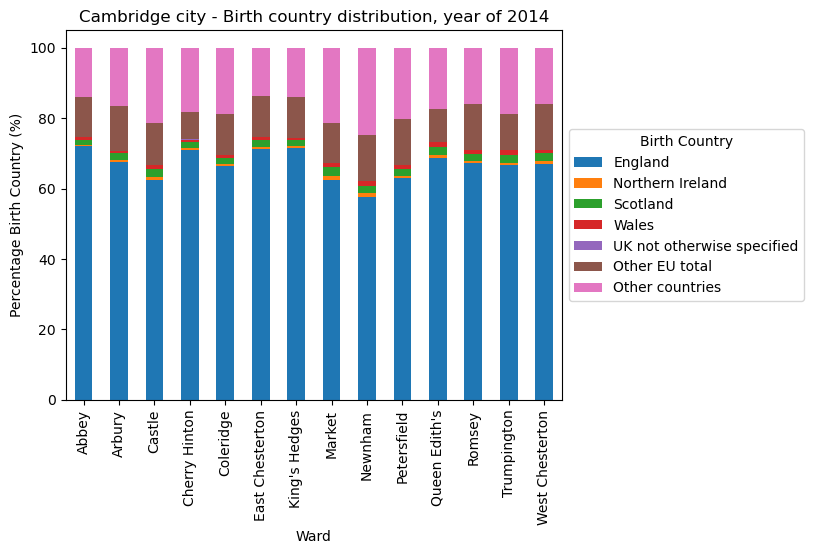

In [13]:
df_cambridge_birthcountry = df_census_cambridge_list[0].copy(deep = True)
df_cambridge_birthcountry.head()
df_cambridge_birthcountry.drop(['Ward Code','Local Authority', 'Total residents'], axis=1, inplace = True)
df_cambridge_birthcountry = df_cambridge_birthcountry.set_index('Ward')
#df_cambridge_birthcountry_pct = df_cambridge_birthcountry.div(df_cambridge_birthcountry.sum(axis = 1), axis = 0).reset_index()
#df_cambridge_birthcountry_pct.head()
#df_cambridge_birthcountry_pct.plot.bar(stacked = True)
df_cambridge_birthcountry.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Birth Country (%)")
plt.title('Cambridge city - Birth country distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Birth Country")
plt.show()

Newnham town has the most diversity of residences.

1.4.2. Dwelling

In [14]:
df_census_cambridge_list[1].describe()

Detached house or bungalow (Accommodation)  \
count                                   14.000000   
mean                                   349.285714   
std                                    235.357806   
min                                     61.000000   
25%                                    173.250000   
50%                                    314.500000   
75%                                    444.500000   
max                                    952.000000   

       Semi-detached house or bungalow (Accommodation)  \
count                                        14.000000   
mean                                        905.785714   
std                                         493.888056   
min                                          84.000000   
25%                                         538.000000   
50%                                        1037.500000   
75%                                        1306.250000   
max                                        1546.000000   

       Terraced house or bungalow (Accommodation)  \
count                                   14.000000   
mean                                  1002.928571   
std                                    459.981850   
min                                    438.000000   
25%                                    732.250000   
50%                                    912.000000   
75%                                   1105.250000   
max                                   2001.000000   

       Flat maisonette or apartment (Accommodation)  \
count                                     14.000000   
mean                                    1036.428571   
std                                      313.464687   
min                                      616.000000   
25%                                      722.000000   
50%                                     1125.500000   
75%                                     1286.250000   
max                                     1462.000000   

       Caravan or other mobile or temporary structure (Accommodation)  \
count                                          14.000000                
mean                                            5.714286                
std                                            10.858733                
min                                             0.000000                
25%                                             1.000000                
50%                                             1.000000                
75%                                             2.500000                
max                                            32.000000                

       Owner occupied (total) (Tenure)  \
count                        14.000000   
mean                       1621.214286   
std                         436.192649   
min                         619.000000   
25%                        1496.750000   
50%                        1728.000000   
75%                        1860.250000   
max                        2156.000000   

       Owner occupied- owned outright (Tenure)  \
count                                14.000000   
mean                                831.357143   
std                                 217.736470   
min                                 411.000000   
25%                                 718.250000   
50%                                 775.000000   
75%                                1016.500000   
max                                1214.000000   

       Owner occupied - owned with a mortgage (Tenure)  \
count                                        14.000000   
mean                                        752.285714   
std                                         275.422034   
min                                         193.000000   
25%                                         698.250000   
50%                                         811.000000   
75%                                         927.500000   
max                                        1075.000000   

       Owner occupied

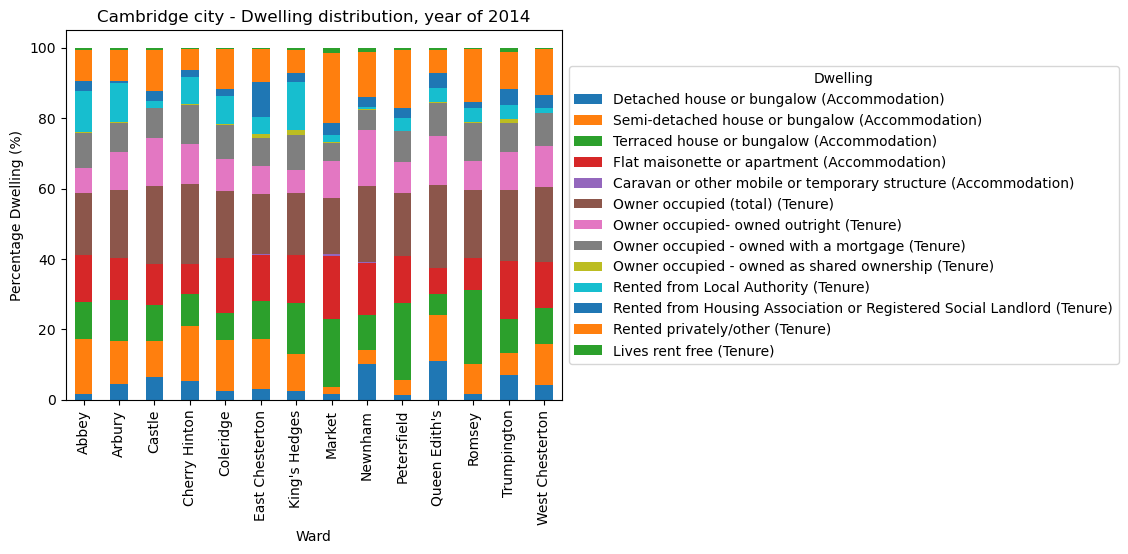

In [15]:
df_cambridge_dwelling = df_census_cambridge_list[1].copy(deep = True)
df_cambridge_dwelling.head()
df_cambridge_dwelling.drop(['Ward Code','Local Authority'], axis=1, inplace = True)
df_cambridge_dwelling = df_cambridge_dwelling.set_index('Ward')
df_cambridge_dwelling.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Dwelling (%)")
plt.title('Cambridge city - Dwelling distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Dwelling")
plt.show()

Market ward has the largest rented privately/other tenure.

1.4.3. Economic

In [16]:
df_census_cambridge_list[2].describe()

Employed (Economically active)  Self-employed (Economically active)  \
count                       14.000000                            14.000000   
mean                      3382.214286                           520.785714   
std                       1007.438349                           117.056317   
min                       1439.000000                           306.000000   
25%                       3246.250000                           496.000000   
50%                       3757.000000                           553.500000   
75%                       4032.000000                           583.000000   
max                       4454.000000                           739.000000   

       Working students (Economically active)  \
count                               14.000000   
mean                               400.214286   
std                                150.260890   
min                                211.000000   
25%                                290.500000   
50%                                355.500000   
75%                                477.250000   
max                                686.000000   

       Unemployed (Economically active)  Retired (Economically inactive)  \
count                         14.000000                        14.000000   
mean                         188.642857                       500.071429   
std                           87.037222                       155.955351   
min                           58.000000                       213.000000   
25%                          127.500000                       381.250000   
50%                          183.500000                       550.000000   
75%                          252.500000                       613.250000   
max                          333.000000                       738.000000   

       Students (Economically inactive)  \
count                         14.000000   
mean                        1533.071429   
std                         1561.606050   
min                          333.000000   
25%                          554.250000   
50%                          853.500000   
75%                         1406.250000   
max                         5190.000000   

       Looking after family (Economically inactive)  \
count                                     14.000000   
mean                                     210.642857   
std                                       83.073283   
min                                       62.000000   
25%                                      155.750000   
50%                                      209.000000   
75%                                      259.000000   
max                                      357.000000   

       Sick/disabled (Economically inactive)  Other (Economically inactive)  \
count                              14.000000                      14.000000   
mean                              174.071429                     110.500000   
std                                95.886523                      40.099396   
min                                27.000000                      53.000000   
25%                               104.250000                      98.750000   
50%                               172.000000                     104.000000   
75%                               228.750000                     116.250000   
max                               346.000000                     188.000000   

       total population aged 16-74  
count                    14.000000  
mean                   7020.214286  
std                     649.798688  
min                    6025.000000  
25%                    6711.500000  
50%                    6911.500000  
75%                    7207.250000  
max                    8749.000000

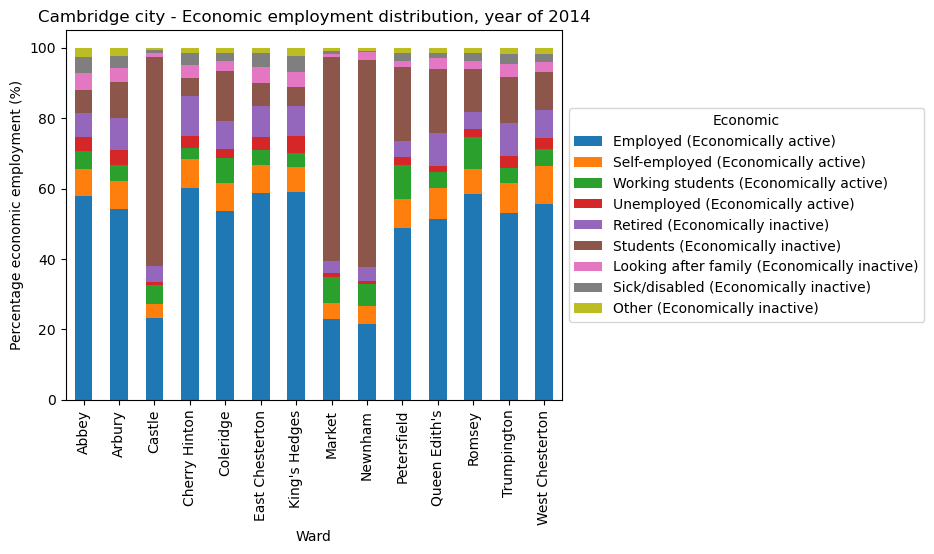

In [17]:
df_cambridge_economic = df_census_cambridge_list[2].copy(deep = True)
df_cambridge_economic.head()
df_cambridge_economic.drop(['Ward Code','Local Authority','total population aged 16-74'], axis=1, inplace = True)
df_cambridge_economic = df_cambridge_economic.set_index('Ward')
df_cambridge_economic.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage economic employment (%)")
plt.title('Cambridge city - Economic employment distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Economic")
plt.show()

There is huge number of students in Castle, arket and Newnham wards. The highest unemployed percentage is at King's Hedges ward.

1.4.4. Ethnicity

In [18]:
df_census_cambridge_list[3].describe()

ethnicity (White British)  ethnicity (White Irish)  \
count                  14.000000                14.000000   
mean                 5838.714286               126.214286   
std                   634.269468                37.963907   
min                  4578.000000                85.000000   
25%                  5575.750000                96.250000   
50%                  5985.500000               115.500000   
75%                  6195.000000               158.500000   
max                  6708.000000               207.000000   

       ethnicity (White: Gypsy and Traveller)  ethnicity (White Other)  \
count                               14.000000                14.000000   
mean                                 7.785714              1327.642857   
std                                  7.587222               216.782275   
min                                  1.000000               833.000000   
25%                                  3.000000              1196.750000   
50%                                  4.500000              1375.000000   
75%                                 12.750000              1493.750000   
max                                 25.000000              1586.000000   

       ethnicity (Mixed - White and Black African)  \
count                                    14.000000   
mean                                     33.571429   
std                                      10.595458   
min                                      20.000000   
25%                                      26.000000   
50%                                      31.500000   
75%                                      41.250000   
max                                      49.000000   

       ethnicity (Mixed- White and Black Caribbean)  \
count                                     14.000000   
mean                                      52.000000   
std                                       22.115084   
min                                       23.000000   
25%                                       35.000000   
50%                                       50.000000   
75%                                       65.750000   
max                                       93.000000   

       ethnicity (Mixed - White and Asian)  ethnicity (Mixed - Other mixed)  \
count                            14.000000                        14.000000   
mean                            107.214286                        88.928571   
std                              34.322405                        13.476271   
min                              60.000000                        68.000000   
25%                              95.750000                        80.000000   
50%                             104.500000                        87.500000   
75%                             116.000000                        95.250000   
max                             201.000000                       116.000000   

       ethnicity (Asian or Asian British - Indian)  \
count                                    14.000000   
mean                                    243.785714   
std                                     100.020135   
min                                     131.000000   
25%                                     175.750000   
50%                                     217.000000   
75%                                     292.250000   
max                                     488.000000   

       ethnicity (Asian or Asian British - Pakistani)  \
count                                       14.000000   
mean                                        53.000000   
std                                         17.750406   
min                                         17.000000   
25%                                         44.000000   
50%                                         60.500000   
75%                                         63.000000   
max                                         76.000000   

       ethnicity (Asian or Asian British - Bangladeshi)  \
count                              

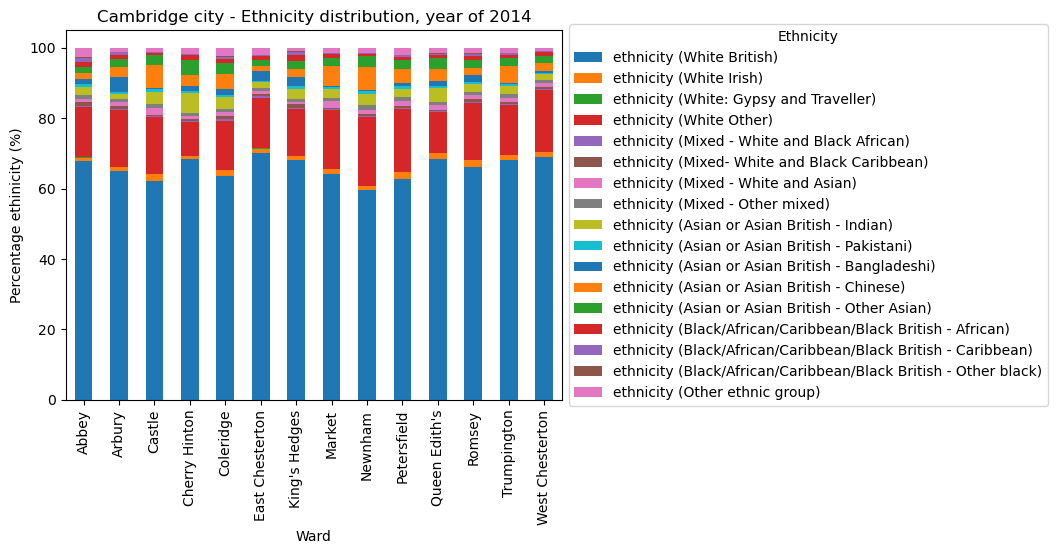

In [19]:
df_cambridge_ethnicity = df_census_cambridge_list[3].copy(deep = True)
df_cambridge_ethnicity.head()
df_cambridge_ethnicity.drop(['Ward Code',
                            'Local Authority',
                            'Percentage of total population (Black/African/Caribbean/Black British - Other black)',
                            'White ethnicity',
                            'Non-White ethnicity',
                            'population (all ethniticities)'],
                            axis=1, inplace = True)
df_cambridge_ethnicity = df_cambridge_ethnicity.set_index('Ward')
df_cambridge_ethnicity.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage ethinicity (%)")
plt.title('Cambridge city - Ethnicity distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Ethnicity")
plt.show()

More other Asian ethnicity population in Cherry Hinton ward, where it may be better for other Asian communities.

1.4.5. Health

In [20]:
df_census_cambridge_list[4].describe()

Residents with very good general health in the previous year  \
count                                          14.000000              
mean                                         4838.785714              
std                                           570.004073              
min                                          4125.000000              
25%                                          4451.250000              
50%                                          4840.000000              
75%                                          5104.750000              
max                                          6402.000000              

       Residents with good general health in the previous year  \
count                                          14.000000         
mean                                         2828.571429         
std                                           423.256190         
min                                          1993.000000         
25%                                          2612.250000         
50%                                          2906.500000         
75%                                          3148.750000         
max                                          3409.000000         

       Residents with fair general health in the previous year  \
count                                          14.000000         
mean                                          858.642857         
std                                           280.265700         
min                                           374.000000         
25%                                           656.000000         
50%                                           857.500000         
75%                                          1102.500000         
max                                          1207.000000         

       Residents with bad or very bad general health in the previous year  \
count                                          14.000000                    
mean                                          321.642857                    
std                                           132.027158                    
min                                           114.000000                    
25%                                           231.500000                    
50%                                           310.000000                    
75%                                           421.500000                    
max                                           513.000000                    

       Residents with a long-term activity-limiting illness  \
count                                          14.000000      
mean                                         1147.428571      
std                                           356.110336      
min                                           530.000000      
25%                                           852.500000      
50%                                          1166.500000      
75%                                          1464.750000      
max                                          1571.000000      

       Residents providing 1-19 hours of unpaid care per week  \
count                                          14.000000        
mean                                          510.428571        
std                                            91.621894        
min                                           326.000000        
25%                                           466.000000        
50%                                           506.000000        
75%                                           538.000000        
max                                           709.000000        

       Residents providing 20-49 hours of unpaid care per week  \
count                                          14.000000         
mean                                           74.428571         
std                                            31.653689         
min                                            19.000000         

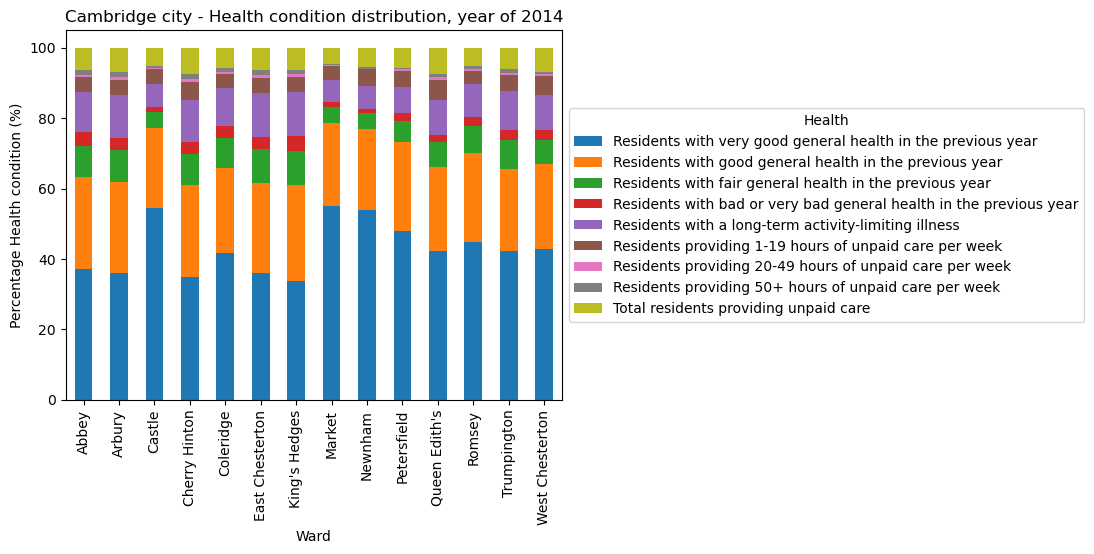

In [21]:
df_cambridge_health = df_census_cambridge_list[4].copy(deep = True)
df_cambridge_health.head()
df_cambridge_health.drop(['Ward Code','Local Authority'], axis=1, inplace = True)
df_cambridge_health = df_cambridge_health.set_index('Ward')
df_cambridge_health.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Health condition (%)")
plt.title('Cambridge city - Health condition distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Health")
plt.show()

Residences in Market ward have the best health condition.

1.4.6. Population

In [22]:
df_census_cambridge_list[5].describe()

male (age 0-4)  female (age 0-4)  population (age 0-4)  male (age 5-9)  \
count        14.00000         14.000000             14.000000       14.000000   
mean        240.00000        238.785714            478.785714      185.214286   
std          94.68084         85.852448            178.533418       56.222331   
min          79.00000         81.000000            160.000000       77.000000   
25%         181.00000        199.750000            380.750000      158.250000   
50%         252.50000        242.500000            493.500000      190.000000   
75%         323.00000        288.500000            604.500000      216.750000   
max         381.00000        405.000000            786.000000      290.000000   

       female (age 5-9)  population (age 5-9)  male (age 10-14)  \
count         14.000000             14.000000         14.000000   
mean         177.142857            362.357143        183.571429   
std           57.653951            112.849530         66.314767   
min           51.000000            128.000000         45.000000   
25%          155.000000            313.500000        142.500000   
50%          200.500000            390.500000        200.000000   
75%          212.750000            432.750000        234.750000   
max          264.000000            554.000000        266.000000   

       female (age 10-14)  population (age 10-14)  male (age 15-19)  \
count           14.000000               14.000000         14.000000   
mean           174.000000              357.571429        375.785714   
std             60.048698              125.101629        184.849701   
min             57.000000              102.000000        208.000000   
25%            132.000000              268.500000        245.500000   
50%            201.500000              410.000000        322.000000   
75%            221.250000              452.000000        430.500000   
max            234.000000              496.000000        849.000000   

       female (age 15-19)  population (age 15-19)  male (age 20-24)  \
count           14.000000               14.000000         14.000000   
mean           355.500000              731.285714        685.285714   
std            151.128448              333.737213        492.196557   
min            217.000000              425.000000        252.000000   
25%            245.000000              491.750000        397.250000   
50%            313.500000              626.500000        460.500000   
75%            387.500000              813.000000        683.500000   
max            720.000000             1569.000000       1924.000000   

       female (age 20-24)  population (age 20-24)  male (age 25-44)  \
count           14.000000               14.000000         14.000000   
mean           605.857143             1291.142857       1540.214286   
std            393.611456              880.825562        324.882506   
min            231.000000              483.000000       1041.000000   
25%            353.500000              747.000000       1255.000000   
50%            455.500000              941.500000       1655.000000   
75%            658.500000             1342.000000       1741.500000   
max           1554.000000             3478.000000       2100.000000   

       female (age 25-44)  population (age 25-44)  male (age 45-59)  \
count           14.000000               14.000000         14.000000   
mean          1377.500000             2917.714286        664.428571   
std            319.747918              633.808686        186.843709   
min            793.000000             1834.000000        299.000000   
25%           1225.750000             2419.250000        578.000000   
50%           1419.500000             3076.000000        744.500000   
75%           1541.500000             3274.250000        787.000000   
max           1901.000000             4001.000000        873.000000   

       female (age 45-59)  population (age 45-59)  male (age 60-64)  \
count           14.000000               14

In [23]:
df_cambridge_population = df_census_cambridge_list[5].copy(deep = True)
df_cambridge_population.head()
df_cambridge_population.drop(['Ward Code','Local Authority','population (all ages)'], axis=1, inplace = True)
filter_population_all = ['Ward'] + [col for col in df_cambridge_population.columns if col.endswith('(all ages)')]
filter_population_male = ['Ward'] + [col for col in df_cambridge_population.columns if col.startswith('male')]
filter_population_female = ['Ward'] + [col for col in df_cambridge_population.columns if col.startswith('female')]
df_cambridge_population_all = df_cambridge_population.loc[:, filter_population_all]
#df_cambridge_population_all.head()
df_cambridge_population_male = df_cambridge_population.loc[:, filter_population_male]
df_cambridge_population_male.drop(['male (all ages)'], axis=1, inplace = True)
#df_cambridge_population_male.head()
df_cambridge_population_female = df_cambridge_population.loc[:, filter_population_female]
df_cambridge_population_female.drop(['female (all ages)'], axis=1, inplace = True)
df_cambridge_population_female.head()

Ward  female (age 0-4)  female (age 5-9)  female (age 10-14)  \
0          Abbey             405.0             264.0               231.0   
1         Arbury             292.0             201.0               204.0   
2         Castle             146.0              88.0                78.0   
3  Cherry Hinton             309.0             213.0               223.0   
4      Coleridge             232.0             212.0               199.0   

   female (age 15-19)  female (age 20-24)  female (age 25-44)  \
0               245.0               387.0              1769.0   
1               249.0               410.0              1413.0   
2               720.0              1554.0               999.0   
3               232.0               231.0              1426.0   
4               380.0               501.0              1486.0   

   female (age 45-59)  female (age 60-64)  female (age 65-74)  \
0               772.0               200.0               230.0   
1               719.0               237.0               289.0   
2               421.0               138.0               238.0   
3               825.0               250.0               350.0   
4               733.0               173.0               273.0   

   female (age 75-84)  female (age 85-89)  female (age 90+)  
0               192.0                76.0              32.0  
1               298.0                96.0              55.0  
2               162.0                38.0              38.0  
3               260.0               116.0              52.0  
4               251.0               111.0              65.0

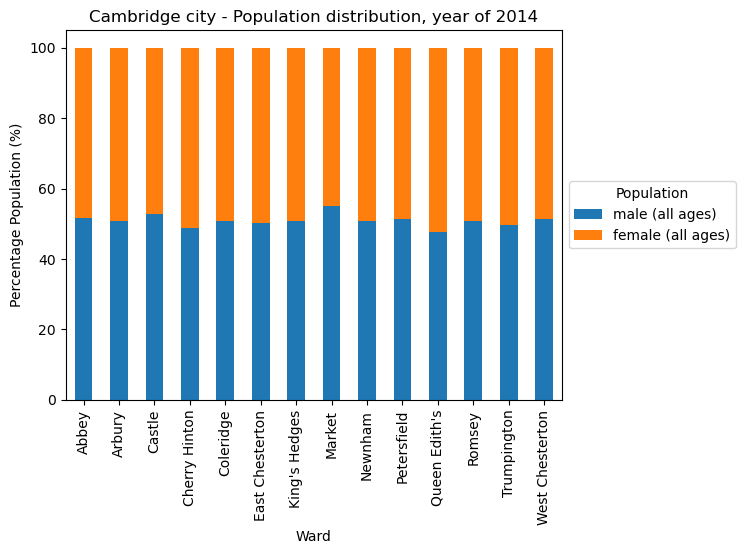

In [24]:
df_cambridge_population_all = df_cambridge_population_all.set_index('Ward')
df_cambridge_population_all.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Population (%)")
plt.title('Cambridge city - Population distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Population")
plt.show()

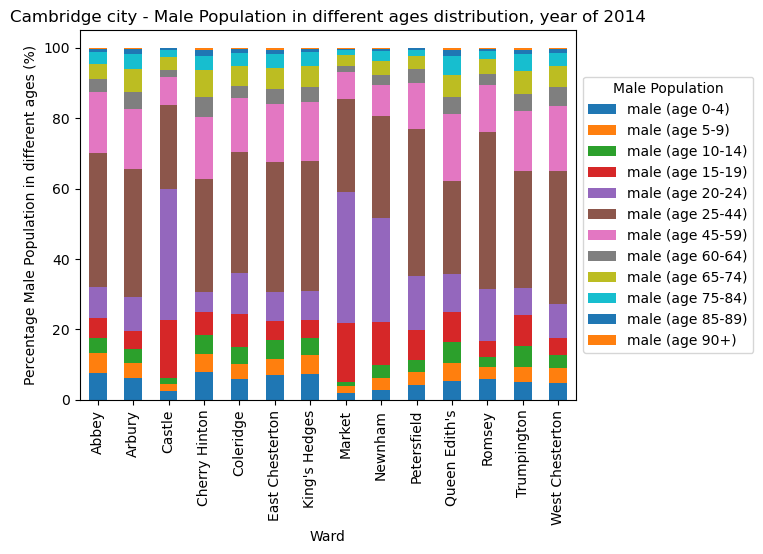

In [25]:
df_cambridge_population_male = df_cambridge_population_male.set_index('Ward')
df_cambridge_population_male.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Male Population in different ages (%)")
plt.title('Cambridge city - Male Population in different ages distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Male Population")
plt.show()

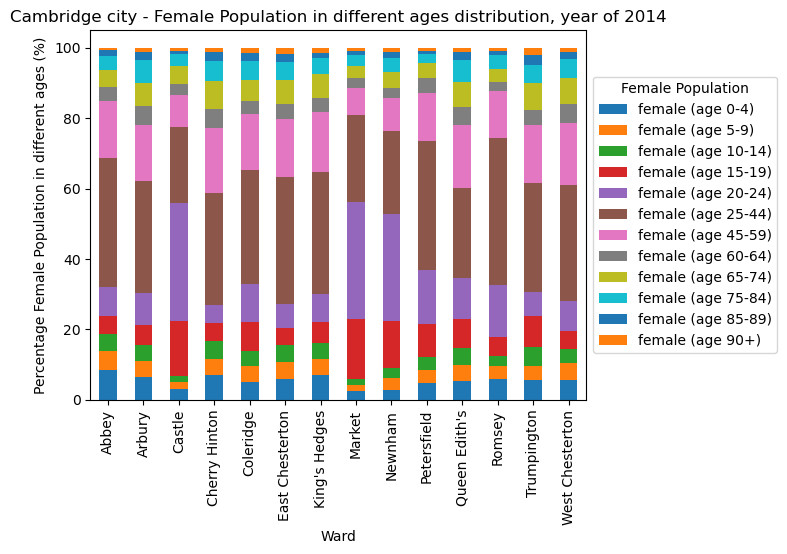

In [26]:
df_cambridge_population_female = df_cambridge_population_female.set_index('Ward')
df_cambridge_population_female.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Female Population in different ages (%)")
plt.title('Cambridge city - Female Population in different ages distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Female Population")
plt.show()

Depending on the age of each child in the family, it may be beneficial to select the ward that has more similar age population. So that, the child or even adult can have more friends at similar age. Lets say for a child at 10 years old, its better to select Trumpington or Cherry Hinton ward to live. 

1.4.7. Qualifications

In [27]:
df_census_cambridge_list[6].describe()

All Usual Residents Aged 16 and Over  No Qualifications  \
count                             14.000000          14.000000   
mean                            7571.928571         900.428571   
std                              622.352048         538.918534   
min                             6688.000000         120.000000   
25%                             7176.250000         457.250000   
50%                             7555.500000         811.000000   
75%                             7886.000000        1379.500000   
max                             9129.000000        1660.000000   

       Level 1 Qualifications  Level 2 Qualifications  Apprenticeship  \
count               14.000000               14.000000       14.000000   
mean               521.000000              654.214286      144.571429   
std                273.659811              200.421164       89.428712   
min                104.000000              323.000000       13.000000   
25%                354.250000              506.000000       82.250000   
50%                477.000000              669.500000      142.500000   
75%                718.750000              817.250000      221.000000   
max                956.000000              925.000000      290.000000   

       Level 3 Qualifications  Level 4 Qualifications and Above  \
count               14.000000                         14.000000   
mean              1281.642857                       3583.500000   
std                978.740368                        699.481869   
min                614.000000                       2362.000000   
25%                690.250000                       3054.500000   
50%                869.000000                       3631.500000   
75%               1080.750000                       4060.500000   
max               3836.000000                       4663.000000   

       Other Qualifications  
count             14.000000  
mean             486.571429  
std              129.475697  
min              278.000000  
25%              382.500000  
50%              501.000000  
75%              615.750000  
max              663.000000

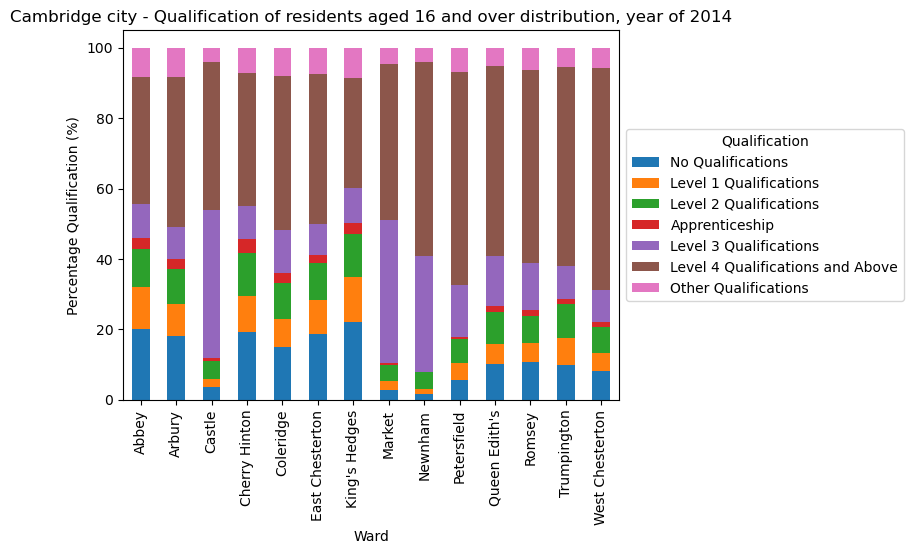

In [28]:
df_cambridge_qualification = df_census_cambridge_list[6].copy(deep = True)
df_cambridge_qualification.head()
df_cambridge_qualification.drop(['Ward Code','Local Authority','All Usual Residents Aged 16 and Over'], axis=1, inplace = True)
df_cambridge_qualification = df_cambridge_qualification.set_index('Ward')
df_cambridge_qualification.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Qualification (%)")
plt.title('Cambridge city - Qualification of residents aged 16 and over distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Qualification")
plt.show()

King's Hedges ward has the highest no qualification residences which may be better to avoid if you are looking for high academic place to live.

1.4.8. Religion

In [29]:
df_census_cambridge_list[7].describe()

Christian    Buddhist       Hindu      Jewish      Muslim       Sikh  \
count    14.000000   14.000000   14.000000   14.000000   14.000000  14.000000   
mean   3965.285714  112.357143  147.000000   62.142857  349.785714  15.214286   
std     647.282179   24.471670   62.299525   47.092147  147.528448   6.326727   
min    2757.000000   61.000000   84.000000   16.000000  152.000000   4.000000   
25%    3687.500000  100.750000   98.750000   25.500000  212.500000  13.250000   
50%    3992.000000  114.000000  121.000000   49.500000  343.000000  15.500000   
75%    4452.750000  128.500000  186.000000   90.250000  495.250000  17.000000   
max    5008.000000  152.000000  267.000000  163.000000  569.000000  30.000000   

       Other religion  No religion  Religion not stated  
count       14.000000    14.000000            14.000000  
mean        50.214286  3345.642857           800.000000  
std         11.004744   515.300003            75.892637  
min         24.000000  2266.000000           648.000000  
25%         46.500000  3128.750000           775.000000  
50%         49.500000  3242.500000           798.500000  
75%         55.500000  3702.000000           817.250000  
max         68.000000  4312.000000           988.000000

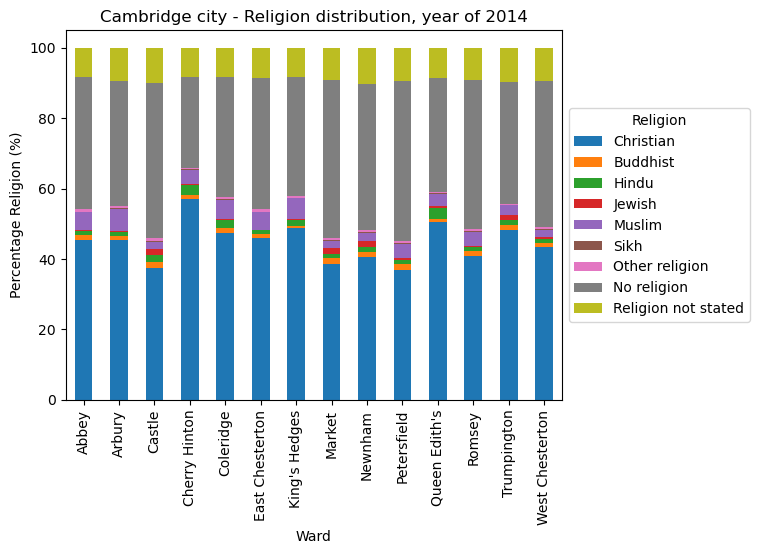

In [30]:
df_cambridge_religion = df_census_cambridge_list[7].copy(deep = True)
df_cambridge_religion.head()
df_cambridge_religion.drop(['Ward Code','Local Authority'], axis=1, inplace = True)
df_cambridge_religion = df_cambridge_religion.set_index('Ward')
df_cambridge_religion.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Religion (%)")
plt.title('Cambridge city - Religion distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Religion")
plt.show()

Cherry Hinton ward has the highest percentage of Christian residences.

1.4.9. Residence

In [31]:
df_census_cambridge_list[8].describe()

Total residents  Born in the UK  Resident in UK: Less than 2 years  \
count        14.000000       14.000000                          14.000000   
mean       8847.642857     6249.000000                         645.857143   
std         774.690470      756.209271                         251.329957   
min        7150.000000     4811.000000                         364.000000   
25%        8407.000000     5804.500000                         461.000000   
50%        9098.500000     6509.500000                         596.000000   
75%        9352.500000     6645.500000                         735.000000   
max        9907.000000     7391.000000                        1145.000000   

       Resident in UK: 2 years or more but less than 5 years  \
count                                          14.000000       
mean                                          581.500000       
std                                           128.972716       
min                                           414.000000       
25%                                           513.000000       
50%                                           550.000000       
75%                                           642.000000       
max                                           884.000000       

       Resident in UK: 5 years or more   \
count                         14.000000   
mean                        1371.285714   
std                          185.922825   
min                          936.000000   
25%                         1316.750000   
50%                         1420.500000   
75%                         1495.250000   
max                         1605.000000   

       Resident in UK: 5 years or more but less than 10 years  \
count                                          14.000000        
mean                                          525.857143        
std                                           103.066713        
min                                           337.000000        
25%                                           482.500000        
50%                                           531.500000        
75%                                           564.250000        
max                                           713.000000        

       Resident in UK: 10 years or more  
count                         14.000000  
mean                         845.428571  
std                          121.800413  
min                          599.000000  
25%                          780.250000  
50%                          837.000000  
75%                          903.500000  
max                         1051.000000

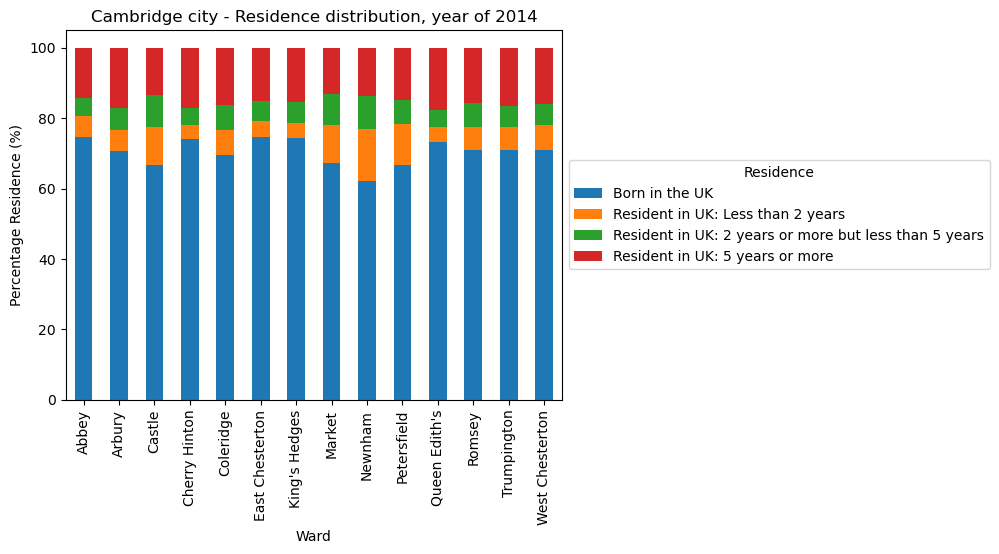

In [32]:
df_cambridge_residence = df_census_cambridge_list[8].copy(deep = True)
df_cambridge_residence.head()
df_cambridge_residence.drop(['Ward Code','Local Authority','Total residents','Resident in UK: 5 years or more but less than 10 years','Resident in UK: 10 years or more'], axis=1, inplace = True)
df_cambridge_residence = df_cambridge_residence.set_index('Ward')
df_cambridge_residence.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Residence (%)")
plt.title('Cambridge city - Residence distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Residence")
plt.show()

Newnham ward has the highest number of residences that stays less than 2 years.

1.4.10. Travel to work

In [33]:
df_census_cambridge_list[9].describe()

Travel to work (All Usual Residents Aged 16 to 74)  \
count                                          14.000000    
mean                                         7020.214286    
std                                           649.798688    
min                                          6025.000000    
25%                                          6711.500000    
50%                                          6911.500000    
75%                                          7207.250000    
max                                          8749.000000    

       Travel to work (Work Mainly at or From Home)  \
count                                     14.000000   
mean                                     275.428571   
std                                       72.504339   
min                                      160.000000   
25%                                      235.250000   
50%                                      269.500000   
75%                                      307.250000   
max                                      432.000000   

       Travel to work (Underground, Metro, Light Rail, Tram)  \
count                                          14.000000       
mean                                            9.714286       
std                                             4.496641       
min                                             4.000000       
25%                                             6.250000       
50%                                             9.000000       
75%                                            12.500000       
max                                            20.000000       

       Travel to work (Train)  Travel to work (Bus, Minibus or Coach)  \
count               14.000000                               14.000000   
mean               208.000000                              275.857143   
std                108.430055                              138.291141   
min                 82.000000                               61.000000   
25%                132.250000                              212.250000   
50%                156.500000                              268.000000   
75%                273.000000                              329.250000   
max                436.000000                              546.000000   

       Travel to work (Taxi)  Travel to work (Motorcycle, Scooter or Moped)  \
count              14.000000                                      14.000000   
mean               15.357143                                      36.000000   
std                 8.072814                                      21.778606   
min                 5.000000                                       7.000000   
25%                10.000000                                      16.000000   
50%                14.000000                                      34.500000   
75%                22.000000                                      54.000000   
max                30.000000                                      71.000000   

       Travel to work (Driving a Car or Van)  \
count                              14.000000   
mean                             1343.571429   
std                               556.480522   
min                               382.000000   
25%                               957.000000   
50%                              1449.500000   
75%                              1775.250000   
max                              2049.000000   

       Travel to work (Passenger in a Car or Van)  Travel to work (Bicycle)  \
count                                   14.000000                 14.000000   
mean                                   119.214286               1268.214286   
std                                     67.464154                363.094855   
min                                     24.000000                594.000000   
25%                                     63.250000               1026.250000   
50%                                    132.000000               1398.500000   
75%                         

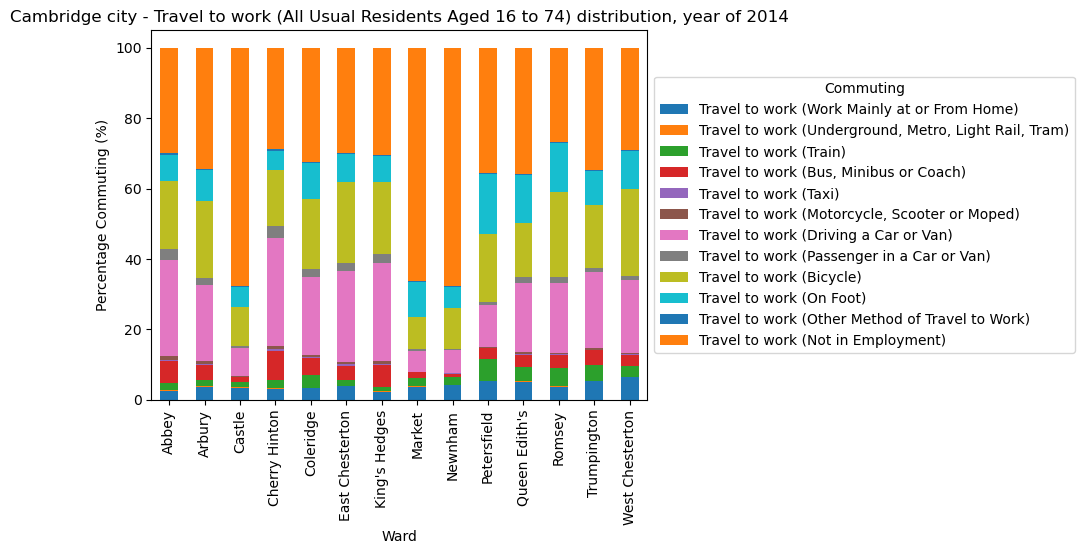

In [34]:
df_cambridge_traveltowork = df_census_cambridge_list[9].copy(deep = True)
df_cambridge_traveltowork.head()
df_cambridge_traveltowork.drop(['Ward Code','Local Authority','Travel to work (All Usual Residents Aged 16 to 74)'], axis=1, inplace = True)
df_cambridge_traveltowork = df_cambridge_traveltowork.set_index('Ward')
df_cambridge_traveltowork.apply(lambda x: x*100/sum(x),axis = 1).plot.bar(stacked = True)
plt.ylabel("Percentage Commuting (%)")
plt.title('Cambridge city - Travel to work (All Usual Residents Aged 16 to 74) distribution, year of 2014')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Commuting")
plt.show()

In Castle, Market and Newnham ward, large percentages are traveling to work but not in employment. Travel to work by bicycle is quite common in most of wards.

1.4.11 Crime rate

In [35]:
df_cambridge_crime_rate_2014.describe()

Total Crime Rate 2013-2014  ASB Rate 2013-2014  \
count                   14.000000           14.000000   
mean                    86.328571           38.500000   
std                    104.700190           30.433913   
min                     29.400000            8.000000   
25%                     45.675000           29.300000   
50%                     58.400000           32.350000   
75%                     71.525000           39.800000   
max                    443.400000          135.700000   

       Burglary Dwelling Rate 2013-2014  Criminal Damage Rate 2013-2014  \
count                         14.000000                       14.000000   
mean                           9.078571                        6.892857   
std                            2.806361                        4.144406   
min                            5.500000                        1.400000   
25%                            6.100000                        4.625000   
50%                            9.300000                        6.250000   
75%                           11.350000                        8.450000   
max                           13.300000                       18.100000   

       Domestic Abuse Rate 2013-2014  Theft of Pedal Cycles Rate 2013-2014  \
count                      14.000000                             14.000000   
mean                       13.971429                             16.678571   
std                         8.022318                             21.168452   
min                         2.200000                              4.300000   
25%                         8.350000                              7.225000   
50%                        12.650000                             11.150000   
75%                        18.100000                             13.200000   
max                        27.000000                             87.000000   

       Vehicle Crime Rate 2013-2014  Violence Against a Person Rate 2013-2014  \
count                     14.000000                                 14.000000   
mean                       4.285714                                 13.071429   
std                        1.657550                                 16.193799   
min                        1.800000                                  1.700000   
25%                        3.125000                                  6.825000   
50%                        4.100000                                  8.000000   
75%                        5.250000                                 13.800000   
max                        7.900000                                 67.200000   

       Violent Crime Rate 2013-2014  
count                     14.000000  
mean                      14.421429  
std                       16.016202  
min                        3.000000  
25%                        7.450000  
50%                        9.750000  
75%                       15.800000  
max                       67.500000

Based on the descriptive statistics, the highest crime rate is for Anti Social Behaviour (ASB) and the 2nd highest is theft of pedal cycles in 2013-2014 fiscal year.

In [36]:
# Select only no qualifications attributes
df_qualifications = df_census_list[6].copy(deep = True)
filter_qualifications = ['Ward'] + [col for col in df_qualifications.columns if col.startswith('No Qualifications')]
df_no_qualifications = df_qualifications.loc[:, filter_qualifications]
df_no_qualifications.head()

Ward  No Qualifications
0          Abbey             1618.0
1         Arbury             1383.0
2         Castle              336.0
3  Cherry Hinton             1369.0
4      Coleridge             1186.0

In [37]:
# Select only Total Crime Rate 2013-2014 attributes
filter_total_crime = ['Ward'] + [col for col in df_cambridge_crime_rate_2014.columns if col.startswith('Total Crime Rate 2013-2014')]
df_cambridge_crime_rate_2014_total = df_cambridge_crime_rate_2014.loc[:, filter_total_crime]
df_cambridge_crime_rate_2014_total.head()

Ward  Total Crime Rate 2013-2014
0          Abbey                        80.6
1         Arbury                        62.1
2         Castle                        36.1
3  Cherry Hinton                        29.4
4      Coleridge                        54.6

In [38]:
# Select only Unemployed attributes
df_economic = df_census_list[2].copy(deep = True)
filter_unemployed = ['Ward'] + [col for col in df_economic.columns if col.startswith('Unemployed')]
df_unemployed = df_economic.loc[:, filter_unemployed]
df_unemployed.head()

Ward  Unemployed (Economically active)
0          Abbey                             287.0
1         Arbury                             302.0
2         Castle                              81.0
3  Cherry Hinton                             210.0
4      Coleridge                             174.0

In [39]:
# Analyse the crime rate with no qualification and unemployed with economically active residences.
df_cambridge_crime_rate_compare = df_cambridge_crime_rate_2014_total.merge(df_no_qualifications, how = 'inner', on = 'Ward')
df_cambridge_crime_rate_compare = df_cambridge_crime_rate_compare.merge(df_unemployed, how = 'inner', on = 'Ward')
df_cambridge_crime_rate_compare.head()

Ward  Total Crime Rate 2013-2014  No Qualifications  \
0          Abbey                        80.6             1618.0   
1         Arbury                        62.1             1383.0   
2         Castle                        36.1              336.0   
3  Cherry Hinton                        29.4             1369.0   
4      Coleridge                        54.6             1186.0   

   Unemployed (Economically active)  
0                             287.0  
1                             302.0  
2                              81.0  
3                             210.0  
4                             174.0

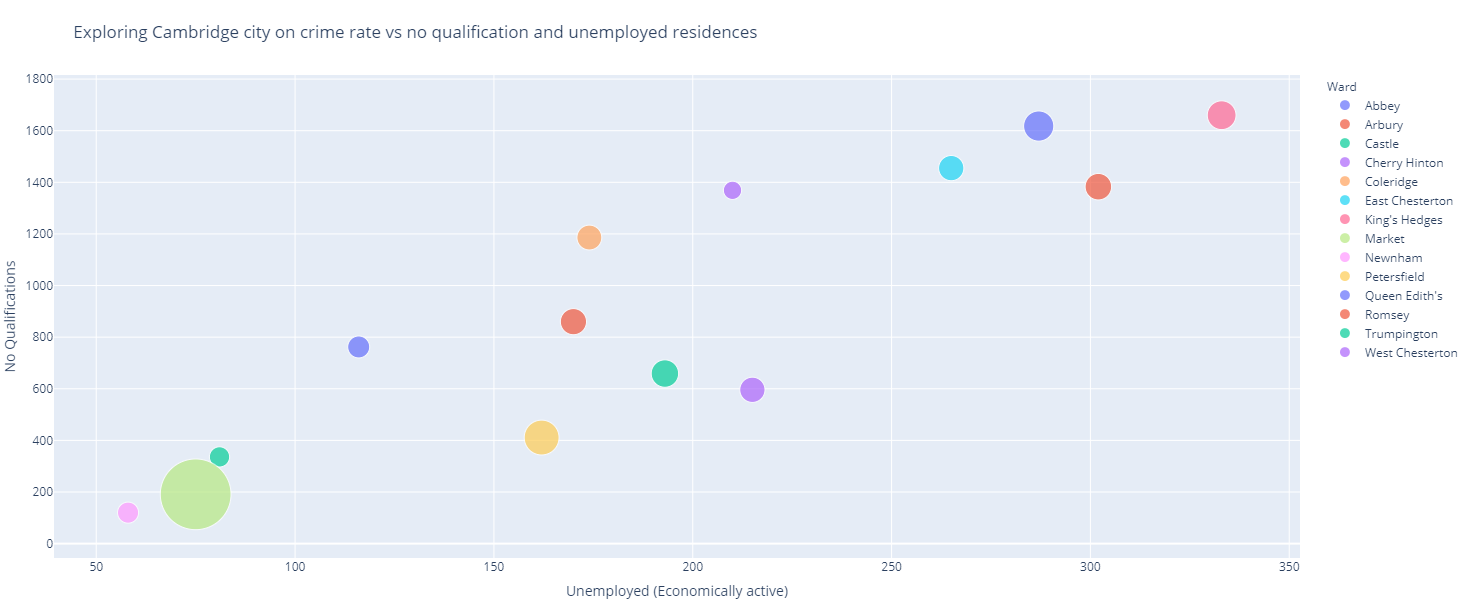

In [40]:
# Plot bubble chart using plotly express for crime rate in comparison to no qualification and unemployed with economically active residences
bubble_chart = px.scatter(df_cambridge_crime_rate_compare, # Dataframe
                        x = 'Unemployed (Economically active)', # Column name for x-values
                        y = 'No Qualifications', # Column name for y-values
                        size = 'Total Crime Rate 2013-2014', # column name for size of bubble
                        color = 'Ward', # Column name for Legend
                        hover_data=({
                        'Unemployed (Economically active)': ':.2f', # Set the no. of decimal places
                        'Total Crime Rate 2013-2014': ':.2f',
                        'No Qualifications': ':.2f'}),
                        hover_name= 'Ward',
                        size_max = 50, # maximum bubble size
                        title='Exploring Cambridge city on crime rate vs no qualification and unemployed residences')
bubble_chart.update_layout(width=800,
                           height=600,
                           margin={'r': 0,'t': 75, 'l': 0, 'b': 0})
bubble_chart.show()

Its quite clear that the higher no qualification number will lead to higher unemployed residences, however the total crime rate is not following this trend.

1.4.12 Housing price

In [107]:
df_cambridge_house_price_wide_T = df_cambridge_house_price.copy(deep = True)
df_cambridge_house_price_wide_T = df_cambridge_house_price_wide.rename(columns={'Ward':''}, inplace = True) # Rename column
df_cambridge_house_price_wide_T = df_cambridge_house_price_wide.set_index('').T # Transpose function
df_cambridge_house_price_wide_T.index.name = 'Period'
df_cambridge_house_price_wide_T.describe()

Abbey         Arbury         Castle  Cherry Hinton  \
count      24.000000      24.000000      24.000000      24.000000   
mean   360457.791667  409379.666667  542911.625000  367091.666667   
std     25532.853930   37503.392345   77390.898579   25351.535782   
min    307046.000000  311585.000000  420427.000000  306248.000000   
25%    340387.750000  390711.250000  499503.750000  360330.500000   
50%    368802.500000  417677.000000  547834.500000  374745.000000   
75%    379840.750000  434263.500000  578843.750000  381214.750000   
max    399431.000000  465786.000000  700267.000000  411668.000000   

           Coleridge  East Chesterton  King's Hedges         Market  \
count      24.000000        24.000000      24.000000      24.000000   
mean   401586.166667    384088.375000  326215.166667  621442.916667   
std     25498.542522     36556.621853   23458.754689   69508.724455   
min    347633.000000    293547.000000  252535.000000  532815.000000   
25%    386318.500000    366208.500000  318835.750000  564419.750000   
50%    396700.500000    386623.500000  332202.500000  600872.500000   
75%    417100.750000    404596.250000  339843.000000  681528.750000   
max    444889.000000    444338.000000  355895.000000  746091.000000   

            Newnham    Petersfield  Queen Edith's         Romsey  \
count  2.400000e+01      24.000000      24.000000      24.000000   
mean   9.198355e+05  526374.166667  716422.458333  407109.208333   
std    1.012821e+05   35730.757234   85994.607768   24187.640527   
min    7.440160e+05  453676.000000  545319.000000  343317.000000   
25%    8.381625e+05  505146.000000  695118.000000  394400.250000   
50%    9.127295e+05  537855.500000  722333.000000  414388.500000   
75%    9.935258e+05  547469.000000  763456.000000  425137.250000   
max    1.126740e+06  591605.000000  852203.000000  435191.000000   

         Trumpington  West Chesterton  
count      24.000000        24.000000  
mean   613859.375000    517857.041667  
std     64423.829405     44690.042932  
min    502546.000000    418857.000000  
25%    577403.250000    478229.750000  
50%    619639.500000    528672.500000  
75%    646445.250000    547284.000000  
max    727366.000000    594065.000000

In [115]:
df_cambridge_house_price_wide = df_cambridge_house_price.copy(deep = True)
df_cambridge_house_price_wide.head()

Ward  Jan 2014 - Dec 2014  Apr 2014 - Mar 2015  \
0          Abbey               307046               319164   
1         Arbury               311585               338043   
2         Castle               434135               420427   
3  Cherry Hinton               306248               315299   
4      Coleridge               347633               365495   

   Jul 2014 - Jun 2015  Oct 2014 - Sep 2015  Jan 2015 - Dec 2015  \
0               335936               349681               346037   
1               348177               369381               381335   
2               420618               431362               456549   
3               326806               337220               342915   
4               365238               395629               388794   

   Apr 2015 - Mar 2016  Jul 2015 - Jun 2016  Oct 2015 - Sep 2016  \
0               341013               338512               321922   
1               391521               417729               409080   
2               571149               573688               580616   
3               356006               362628               371371   
4               386789               380872               379658   

   Jan 2016 - Dec 2016  Apr 2016 - Mar 2017  Jul 2016 - Jun 2017  \
0               332510               347865               365474   
1               411853               417625               388282   
2               609785               530163               508468   
3               378725               374450               375040   
4               391914               397772               411254   

   Oct 2016 - Sep 2017  Jan 2017 - Dec 2017  Apr 2017 - Mar 2018  \
0               384914               399431               393395   
1               419680               441992               451911   
2               480825               505730               527288   
3               376582               375883               385047   
4               426016               434509               439460   

   Jul 2017 - Jun 2018  Oct 2017 - Sep 2018  Jan 2018 - Dec 2018  \
0               381531               378534               380293   
1               465786               443822               443677   
2               651031               700267               644229   
3               379359               368705               361772   
4               436347               444889               430291   

   Apr 2018 - Mar 2019  Jul 2018 - Jun 2019  Oct 2018 - Sep 2019  \
0               372131               383168               378085   
1               435627               422404               430298   
2               652898               578253               549295   
3               367631               380722               392484   
4               413118               413645               384907   

   Jan 2019 - Dec 2019  Apr 2019 - Mar 2020  Jul 2019 - Jun 2020  \
0               378888               379690               362753   
1               414978               413159               433809   
2               572153               546374               524625   
3               411668               395873               385073   
4               392049               393976               403684   

   Oct 2019 - Sep 2020  
0               373014  
1               423358  
2               559951  
3               382693  
4               414129

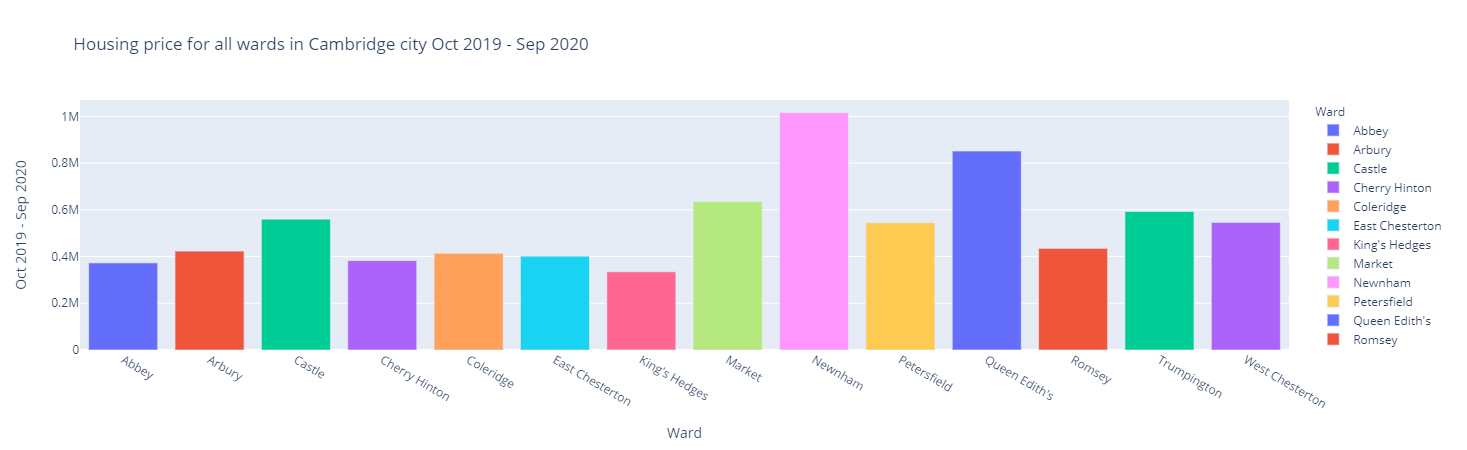

In [116]:
#df_cambridge_house_price.iloc[:,1:25].columns
df_cambridge_house_price_wide.set_index('Ward', inplace = True)
#df_cambridge_house_price_long = df_cambridge_house_price_wide.reset_index().melt(id_vars = 'Ward', value_name = 'Price')
#df_cambridge_house_price_long
fig = px.bar(df_cambridge_house_price_wide, 
              x = df_cambridge_house_price_wide.index,
              y = df_cambridge_house_price_wide['Oct 2019 - Sep 2020'],
             color = df_cambridge_house_price_wide.index,
             title = 'Housing price for all wards in Cambridge city Oct 2019 - Sep 2020')
fig.show()

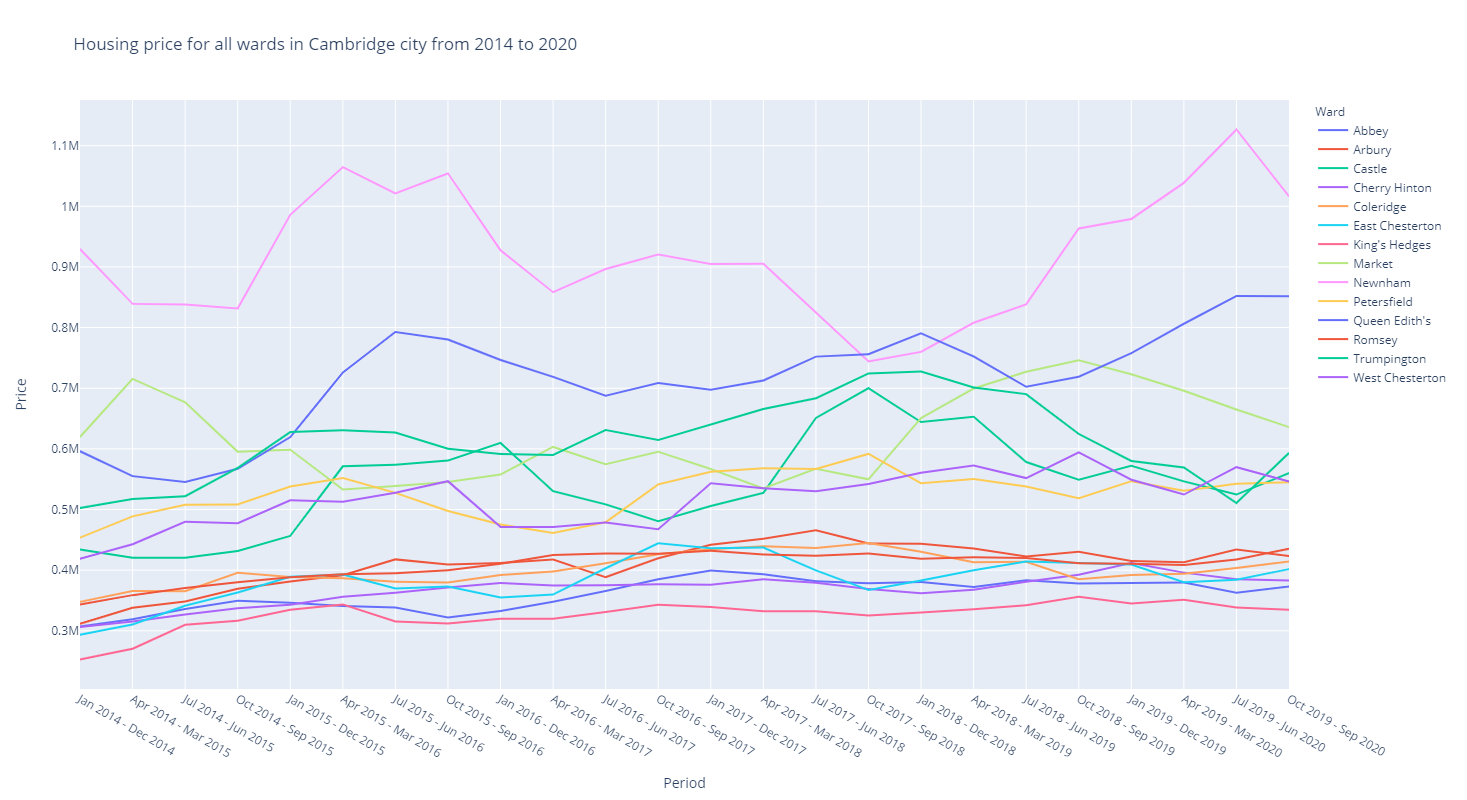

In [123]:
# Convert to long dataframe to plot multiple lines
df_cambridge_house_price_long = df_cambridge_house_price_wide.reset_index().melt(id_vars = 'Ward', var_name = 'Period', value_name = 'Price')
#df_cambridge_house_price_long.head()
fig = px.line(df_cambridge_house_price_long, 
              x = 'Period',
              y = 'Price',
             color = 'Ward',
             title = 'Housing price for all wards in Cambridge city from 2014 to 2020')
fig.update_layout(width = 1200, height = 800)
fig.show()

Newnham ward is the most expensive place to buy houses.

##### 1.5. Mapping <a name="Mapping"></a>

In this section, I will use geopy to collect all coordinates (Latitude and Longitude) of each wards and show them in the map. Map will be plotted with folium library.

In [124]:
# Add the empty columns for geographical data
df_cambridge_ward['Ward Latitude'] = ""
df_cambridge_ward['Ward Longitude'] = ""
df_cambridge_ward['Address'] = ""
df_cambridge_ward

Ward Ward Latitude Ward Longitude Address
0             Abbey                                     
1            Arbury                                     
2            Castle                                     
3     Cherry Hinton                                     
4         Coleridge                                     
5   East Chesterton                                     
6     King's Hedges                                     
7            Market                                     
8           Newnham                                     
9       Petersfield                                     
10    Queen Edith's                                     
11           Romsey                                     
12      Trumpington                                     
13  West Chesterton

In [126]:
# Use Nominatim to get the latitudes and longitudes of Cambridge wards
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

for n in range(len(df_cambridge_ward)):   
    address= df_cambridge_ward['Ward'][n]
    address=(df_cambridge_ward['Ward'][n]+ '  , '+' Cambridge UK ')
    geolocator = Nominatim(user_agent="TNguyen50")
    location = geolocator.geocode(address)
    if(location):
        latitude = location.latitude
        longitude = location.longitude
        df_cambridge_ward['Ward Latitude'][n]=latitude
        df_cambridge_ward['Ward Longitude'][n]=longitude
        df_cambridge_ward['Address'][n]=location
        #print(n,latitude,longitude)
print('Geodata completed')
df_cambridge_ward

     |████████████████████████████████| 122kB 976kB/s eta 0:00:01
Geodata completed


Ward Ward Latitude Ward Longitude  \
0             Abbey       52.3138      0.0502717   
1            Arbury        52.221       0.114808   
2            Castle        52.212       0.114699   
3     Cherry Hinton       52.1878       0.175241   
4         Coleridge       52.1937       0.152713   
5   East Chesterton       52.2165       0.156338   
6     King's Hedges       52.2292       0.135074   
7            Market       52.1964       0.129776   
8           Newnham       52.1965       0.107044   
9       Petersfield       52.1998       0.135933   
10    Queen Edith's       52.1766       0.147808   
11           Romsey        52.198       0.148062   
12      Trumpington        52.174       0.112116   
13  West Chesterton       52.2223       0.144592   

                                              Address  
0   (The Abbey, Over Mereway, Fenlow Farm, Willing...  
1   (Arbury Ward, Chesterton, Cambridge, Cambridge...  
2   (Castle Mound, Cambridge, Cambridgeshire, East...  
3   (Cherry Hinton, Cambridge, Cambridgeshire, Eas...  
4   (Coleridge Community College, Radegund Road, R...  
5   (E, Beadle Industrial Estate, Barnwell, Cambri...  
6   (King's Hedges Ward, Chesterton, Cambridge, Ca...  
7   (HSBC UK, 62, Hills Road, Petersfield, Cambrid...  
8   (Newnham, Cambridge, Cambridgeshire, East of E...  
9   (Petersfield, Cambridge, Cambridgeshire, East ...  
10  (Queen Edith's Ward, Cambridge, Cambridgeshire...  
11  (Romsey, Cambridge, Cambridgeshire, East of En...  
12  (Trumpington, Cambridge, Cambridgeshire, East ...  
13  (Chesterton, Cambridge, Cambridgeshire, East o...

In [127]:
# use geopy library to get the latitude and longitude values of Cambridge, UK
address = 'Cambridge, UK'
geolocator = Nominatim(user_agent="TNguyen50")
try:
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Cambridge, UK are {}, {}.'.format(latitude, longitude))
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(my_address, e.message)) #should be with address only?

The geograpical coordinate of Cambridge, UK are 52.2034823, 0.1235817.


In [128]:
# Create map of Cambridge city using latitude and longitude values of wards
#! pip install folium==0.5.0 #Folium is a Python library used for visualizing geospatial data, can select instead of conda
import folium # map rendering library
from folium import plugins # additional visualization

map_cambridge = folium.Map(location=[latitude, longitude], zoom_start=13)

# Add markers from df_cambridge_ward to map
for lat, lng, label in zip(df_cambridge_ward['Ward Latitude'], df_cambridge_ward['Ward Longitude'], df_cambridge_ward['Ward']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cambridge)
map_cambridge

##### 1.6. Collect FourSquare Venues <a name="Collect_FourSquare_Venues"></a>

In this section, I will collect top 100 venues in each Cambridge ward with radius of 1000m using the Foursquare API.

In [129]:
# Define Foursquare Credentials and Version
CLIENT_ID = '4CYUWEOIFGPPOY1VF5UWIA3HTTV4GB1EW23OYBEPJMEWLZFJ' # Foursquare ID
CLIENT_SECRET = 'DK30GGNFGMJSRHCMIGC2AMNA1N0CM43WYIBUPDZSYJS2GCDL' # Foursquare Secret Key
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [130]:
# Define function to obtain all venues in each ward, radius = 1000m
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward', 'Ward Latitude', 'Ward Longitude', 'Venue', 'Venue Latitude','Venue Longitude', 'Venue Category']
    return (nearby_venues)

In [131]:
# Use the function created above to obtain Venues and Venue Catgories for each ward
df_cambridge_venues = getNearbyVenues(names = df_cambridge_ward['Ward'],
                                 latitudes = df_cambridge_ward['Ward Latitude'],
                                 longitudes = df_cambridge_ward['Ward Longitude'])
df_cambridge_venues.head()

Ward  Ward Latitude  Ward Longitude                   Venue  \
0  Abbey      52.313816        0.050272      Duke of Wellington   
1  Abbey      52.313816        0.050272     Willingham Auctions   
2  Abbey      52.313816        0.050272            Royal Bengal   
3  Abbey      52.313816        0.050272  Highgate Country Store   
4  Abbey      52.313816        0.050272              Co-op Food   

   Venue Latitude  Venue Longitude     Venue Category  
0       52.314396         0.063118                Pub  
1       52.311609         0.056440             Market  
2       52.314658         0.061837  Indian Restaurant  
3       52.311601         0.051831          Pet Store  
4       52.314179         0.057712      Grocery Store

#### Summary of data mining for venues

In [133]:
# Check the size of the resulting dataframe
print('{} venues were found'.format(df_cambridge_venues.shape[0]))
# Check the number of unique venue categories
print('{} uniques of venue categories.'.format(len(df_cambridge_venues['Venue Category'].unique())))
df_cambridge_venues_summary = df_cambridge_venues.groupby('Ward').count().reset_index()
df_cambridge_venues_summary['Count'] = df_cambridge_venues_summary['Venue']
df_cambridge_venues_summary = df_cambridge_venues_summary.drop(['Ward Latitude', 'Ward Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
df_cambridge_venues_summary = df_cambridge_venues_summary.sort_values('Count', ascending = False).reset_index(drop=True)
df_cambridge_venues_summary

533 venues were found
112 uniques of venue categories.


Ward  Count
0            Market    100
1       Petersfield    100
2            Castle     96
3            Romsey     69
4   East Chesterton     32
5         Coleridge     29
6            Arbury     23
7     King's Hedges     18
8           Newnham     16
9     Cherry Hinton     15
10  West Chesterton     14
11    Queen Edith's      9
12      Trumpington      7
13            Abbey      5

#### Bar chart to see the number of venues per each ward

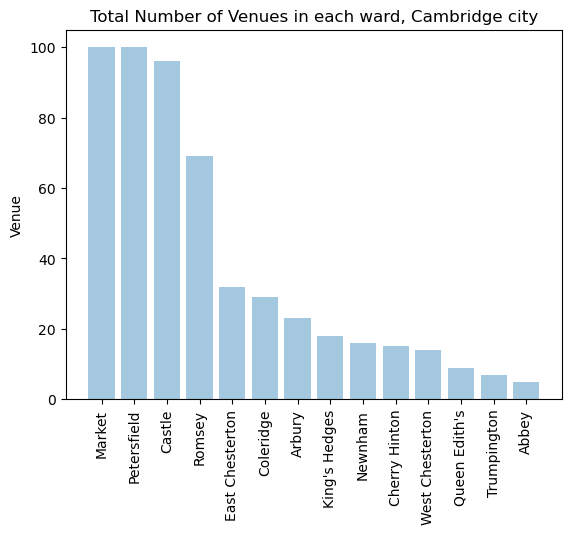

In [134]:
objects = df_cambridge_venues_summary['Ward']
y_pos = np.arange(len(objects))
performance = df_cambridge_venues_summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venues in each ward, Cambridge city')
plt.xticks(rotation=90)

plt.show()

We can observe that Market, Petersfield, Castle and Romsey has most number of venues. Abbey presents the least venue ward. The result reflects only within 1km radius of each selected address which presents for each ward. So we may need to clarify more specific address for further comparison.

##### 1.7. Data Analyzing <a name="Data_Analyzing"></a>

In this section, I will analyze the venue catergories using one hot encoding to convert venue categories to numerical formats for each ward.

In [135]:
# One hot encoding to convert venue categories to numerical formats for each ward.
df_cambridge_venues_onehot = pd.get_dummies(df_cambridge_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
df_cambridge_venues_onehot['Ward'] = df_cambridge_venues['Ward'] 

# Move ward column to the first column
fixed_columns = [df_cambridge_venues_onehot.columns[-1]] + list(df_cambridge_venues_onehot.columns[:-1])
df_cambridge_venues_onehot = df_cambridge_venues_onehot[fixed_columns]

df_cambridge_venues_onehot.head()

Ward  African Restaurant  American Restaurant  Art Gallery  \
0  Abbey                   0                    0            0   
1  Abbey                   0                    0            0   
2  Abbey                   0                    0            0   
3  Abbey                   0                    0            0   
4  Abbey                   0                    0            0   

   Arts & Crafts Store  Asian Restaurant  BBQ Joint  Bakery  Bar  \
0                    0                 0          0       0    0   
1                    0                 0          0       0    0   
2                    0                 0          0       0    0   
3                    0                 0          0       0    0   
4                    0                 0          0       0    0   

   Bed & Breakfast  Beer Bar  Beer Garden  Boat or Ferry  Bookstore  \
0                0         0            0              0          0   
1                0         0            0              0          0   
2                0         0            0              0          0   
3                0         0            0              0          0   
4                0         0            0              0          0   

   Botanical Garden  Breakfast Spot  Brewery  Buffet  Burger Joint  \
0                 0               0        0       0             0   
1                 0               0        0       0             0   
2                 0               0        0       0             0   
3                 0               0        0       0             0   
4                 0               0        0       0             0   

   Burrito Place  Bus Station  Bus Stop  Café  Candy Store  Carpet Store  \
0              0            0         0     0            0             0   
1              0            0         0     0            0             0   
2              0            0         0     0            0             0   
3              0            0         0     0            0             0   
4              0            0         0     0            0             0   

   Chinese Restaurant  Clothing Store  Coffee Shop  Concert Hall  \
0                   0               0            0             0   
1                   0               0            0             0   
2                   0               0            0             0   
3                   0               0            0             0   
4                   0               0            0             0   

   Construction & Landscaping  Convenience Store  Creperie  Deli / Bodega  \
0                           0                  0         0              0   
1                           0                  0         0              0   
2                           0                  0         0              0   
3                           0                  0         0              0   
4                           0                  0         0              0   

   Department Store  Discount Store  Dumpling Restaurant  \
0                 0               0                    0   
1                 0               0                    0   
2                 0               0                    0   
3                 0               0                    0   
4                 0               0                    0   

   Eastern European Restaurant  Electronics Store  English Restaurant  \
0                            0                  0                   0   
1                            0                  0                   0   
2                            0                  0                   0   
3                            0                  0                   0   
4                            0                  0                   0   

   Fast Food Restaurant  Field  Fish & Chips Shop  Food & Drink Shop  \
0                     0      0                  0                  0   
1                     0      0                  0                  0   
2    

In [136]:
df_cambridge_venues_onehot.shape

(533, 113)

In [137]:
# Group by ward and by taking the mean of the frequency of occurrence of each category
df_cambridge_venues_grouped_mean = df_cambridge_venues_onehot.groupby('Ward').mean().reset_index()
df_cambridge_venues_grouped_mean

Ward  African Restaurant  American Restaurant  Art Gallery  \
0             Abbey            0.000000             0.000000     0.000000   
1            Arbury            0.000000             0.000000     0.000000   
2            Castle            0.000000             0.010417     0.010417   
3     Cherry Hinton            0.000000             0.000000     0.000000   
4         Coleridge            0.000000             0.000000     0.000000   
5   East Chesterton            0.000000             0.000000     0.000000   
6     King's Hedges            0.000000             0.000000     0.000000   
7            Market            0.020000             0.000000     0.000000   
8           Newnham            0.000000             0.000000     0.000000   
9       Petersfield            0.020000             0.000000     0.000000   
10    Queen Edith's            0.000000             0.000000     0.000000   
11           Romsey            0.028986             0.000000     0.000000   
12      Trumpington            0.000000             0.000000     0.000000   
13  West Chesterton            0.000000             0.000000     0.000000   

    Arts & Crafts Store  Asian Restaurant  BBQ Joint    Bakery       Bar  \
0              0.000000          0.000000       0.00  0.000000  0.000000   
1              0.000000          0.000000       0.00  0.000000  0.000000   
2              0.000000          0.000000       0.00  0.000000  0.020833   
3              0.000000          0.000000       0.00  0.000000  0.000000   
4              0.000000          0.000000       0.00  0.000000  0.034483   
5              0.000000          0.000000       0.00  0.000000  0.000000   
6              0.000000          0.055556       0.00  0.000000  0.000000   
7              0.000000          0.030000       0.01  0.010000  0.050000   
8              0.000000          0.000000       0.00  0.062500  0.000000   
9              0.000000          0.010000       0.01  0.030000  0.040000   
10             0.000000          0.000000       0.00  0.000000  0.000000   
11             0.014493          0.000000       0.00  0.014493  0.028986   
12             0.000000          0.000000       0.00  0.000000  0.000000   
13             0.000000          0.000000       0.00  0.000000  0.000000   

    Bed & Breakfast  Beer Bar  Beer Garden  Boat or Ferry  Bookstore  \
0          0.000000  0.000000     0.000000       0.000000   0.000000   
1          0.000000  0.000000     0.000000       0.043478   0.000000   
2          0.010417  0.020833     0.000000       0.000000   0.020833   
3          0.000000  0.000000     0.000000       0.000000   0.000000   
4          0.000000  0.000000     0.000000       0.000000   0.000000   
5          0.000000  0.000000     0.031250       0.000000   0.000000   
6          0.111111  0.000000     0.000000       0.000000   0.000000   
7          0.000000  0.000000     0.000000       0.000000   0.000000   
8          0.000000  0.000000     0.000000       0.000000   0.000000   
9          0.000000  0.000000     0.000000       0.000000   0.010000   
10         0.000000  0.000000     0.000000       0.000000   0.000000   
11         0.000000  0.000000     0.000000       0.000000   0.000000   
12         0.000000  0.000000     0.000000       0.000000   0.000000   
13         0.142857  0.000000     0.071429       0.000000   0.000000   

    Botanical Garden  Breakfast Spot   Brewery  Buffet  Burger Joint  \
0               0.00            0.00  0.000000    0.00      0.000000   
1               0.00            0.00  0.000000    0.00      0.000000   
2               0.00            0.00  0.000000    0.00      0.052083   
3               0.00            0.00  0.000000    0.00      0.000000   
4               0.00            0.00  0.000000    0.00      0.000000   
5               0.00            0.00  0.000000    0.00      0.000000   
6               0.00            0.00  0.000000    0.00      0.000000   
7               0.01            0.01  0.000000    0.01      0

In [138]:
df_cambridge_venues_grouped_mean.shape

(14, 113)

In [139]:
# Sort the highest number of all venue categories
df_cambridge_venues_grouped_sum = df_cambridge_venues_onehot.groupby('Ward').sum().reset_index() # Sum all the venue categories for each neighbourhood
df_cambridge_venues_grouped_sum.rename(columns={'Ward':''},inplace=True) # Rename columns
df_cambridge_venues_grouped_sum = df_cambridge_venues_grouped_sum.set_index('').T # Transpose function
df_cambridge_venues_grouped_sum.reset_index(inplace=True)
df_cambridge_venues_grouped_sum.rename(columns = {'index':'Venue Category'},inplace=True) # Rename columns
df_cambridge_venues_grouped_sum['Total'] = df_cambridge_venues_grouped_sum.sum(axis=1,numeric_only = True) # Obtain Sum of all venue categories, if without numeric_only = True, an error for "FutureWarning: " will appear
# Move Total column to the first column
column_to_move = df_cambridge_venues_grouped_sum.pop("Total")
# Insert column with insert(location, column_name, column_value)
df_cambridge_venues_grouped_sum.insert(1, "Total", column_to_move) # Change location if needed
# Sort by Total of venue categories
df_cambridge_venues_grouped_sum = df_cambridge_venues_grouped_sum.sort_values(by='Total', ascending=False) # Sort venue categories in descending order
df_cambridge_venues_grouped_sum.reset_index(inplace = True)
df_cambridge_venues_grouped_sum.drop(['index'], axis=1, inplace=True)
df_cambridge_venues_grouped_sum.head() # Display top 5 rows

Venue Category  Total  Abbey  Arbury  Castle  Cherry Hinton  Coleridge  \
0                Pub     78      1       4      13              0          4   
1      Grocery Store     32      1       2       3              1          2   
2        Coffee Shop     30      0       1       4              0          0   
3               Café     23      0       0       5              0          2   
4  Indian Restaurant     19      1       3       3              1          0   

   East Chesterton  King's Hedges  Market  Newnham  Petersfield  \
0                0              2      13        4           17   
1                1              3       4        1            5   
2                2              1       7        0            6   
3                0              0       5        0            7   
4                1              0       3        0            4   

   Queen Edith's  Romsey  Trumpington  West Chesterton  
0              1      15            2                2  
1              0       7            0                2  
2              3       5            0                1  
3              0       4            0                0  
4              0       3            0                0

#### Visualizing Top venue categories using Plotly Express Library.

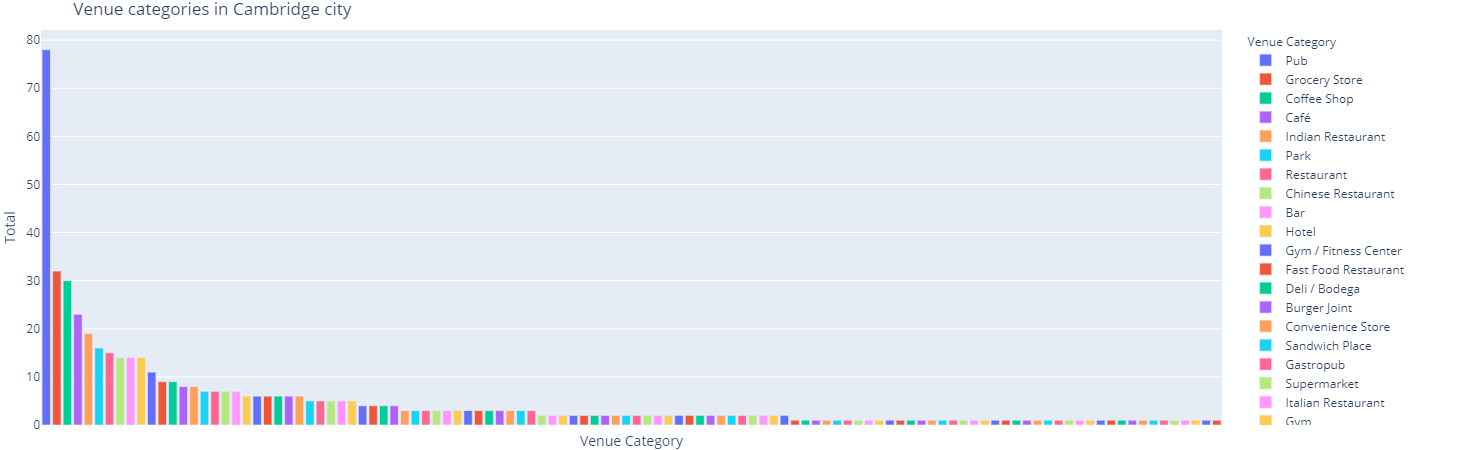

In [140]:
#import plotly.express as px
fig = px.bar(df_cambridge_venues_grouped_sum, x="Venue Category",y="Total", color="Venue Category")
fig.update_layout(title = 'Venue categories in Cambridge city', margin={"r":0,"t":30,"l":0,"b":0})
fig.update_xaxes(showticklabels=False) # Removed tick labels as it was too long
fig.show() # Display plot

Its quite obvious that pub is the most popular venue in Cambridge, more than double the grocery store.

#### Now, lets look at the number of restaurants in each ward

In [141]:
#Select only restaurant
df_cambridge_restaurant = df_cambridge_venues_grouped_sum[df_cambridge_venues_grouped_sum["Venue Category"].str.contains("Restaurant")].reset_index(drop=True)
df_cambridge_restaurant

Venue Category  Total  Abbey  Arbury  Castle  \
0               Indian Restaurant     19      1       3       3   
1                      Restaurant     15      0       0       4   
2              Chinese Restaurant     14      0       1       1   
3            Fast Food Restaurant      9      0       0       0   
4              Italian Restaurant      7      0       0       2   
5              Seafood Restaurant      6      0       0       0   
6                Sushi Restaurant      6      0       0       3   
7              African Restaurant      6      0       0       0   
8               French Restaurant      5      0       0       1   
9                Asian Restaurant      5      0       0       0   
10                Thai Restaurant      5      0       0       0   
11              Korean Restaurant      4      0       0       0   
12          Portuguese Restaurant      3      0       0       0   
13             English Restaurant      3      0       0       2   
14          Sri Lankan Restaurant      2      0       1       1   
15  Vegetarian / Vegan Restaurant      2      0       1       1   
16               Greek Restaurant      2      0       0       0   
17    Eastern European Restaurant      1      0       0       1   
18            American Restaurant      1      0       0       1   
19             Turkish Restaurant      1      0       0       0   
20      Latin American Restaurant      1      0       0       1   
21            Dumpling Restaurant      1      0       0       0   

    Cherry Hinton  Coleridge  East Chesterton  King's Hedges  Market  Newnham  \
0               1          0                1              0       3        0   
1               1          1                0              1       4        1   
2               0          0                0              1       4        0   
3               0          1                3              0       0        0   
4               0          1                0              0       2        0   
5               0          1                0              0       2        1   
6               0          1                0              0       1        0   
7               0          0                0              0       2        0   
8               0          0                0              0       2        0   
9               0          0                0              1       3        0   
10              0          0                1              0       2        1   
11              0          0                0              0       2        0   
12              0          0                0              0       2        0   
13              0          0                0              0       1        0   
14              0          0                0              0       0        0   
15              0          0                0              0       0        0   
16              0          0                0              0       1        0   
17              0          0                0              0       0        0   
18              0          0                0              0       0        0   
19              0          0                0              0       0        0   
20              0          0                0              0       0        0   
21              0          0                0              0       0        0   

    Petersfield  Queen Edith's  Romsey  Trumpington  West Chesterton  
0             4              0       3            0                0  
1             3              0       0            0                0  
2             6              0       1            0                0  
3             1              2       1            1                0  
4             1              0       1            0                0  
5             1              0       1            0                0  
6             0              0       1            0                0  
7             2              0       2       

In [142]:
df_cambridge_restaurant_sum = df_cambridge_restaurant.drop(columns = ['Venue Category'], axis = 1).copy(deep=True)
df_cambridge_restaurant_sum.loc['Number of Restaurants'] = df_cambridge_restaurant_sum.sum(axis = 0)
df_cambridge_restaurant_sum = df_cambridge_restaurant_sum.drop(labels = range(0,22), axis = 0)
df_cambridge_restaurant_sum

Total  Abbey  Arbury  Castle  Cherry Hinton  Coleridge  \
Number of Restaurants    118      1       6      21              2          5   

                       East Chesterton  King's Hedges  Market  Newnham  \
Number of Restaurants                5              3      31        3   

                       Petersfield  Queen Edith's  Romsey  Trumpington  \
Number of Restaurants           27              2      11            1   

                       West Chesterton  
Number of Restaurants                0

In [143]:
df_cambridge_restaurant_sum = df_cambridge_restaurant_sum.T # Transpose function

In [144]:
df_cambridge_restaurant_sum = df_cambridge_restaurant_sum.drop('Total')
df_cambridge_restaurant_sum.reset_index(inplace=True)
df_cambridge_restaurant_sum.rename(columns = {'':'Ward'}, inplace = True)
df_cambridge_restaurant_sum = df_cambridge_restaurant_sum.sort_values(by='Number of Restaurants', ascending=False) # Sort venue categories in descending order
df_cambridge_restaurant_sum

Ward  Number of Restaurants
7            Market                     31
9       Petersfield                     27
2            Castle                     21
11           Romsey                     11
1            Arbury                      6
4         Coleridge                      5
5   East Chesterton                      5
6     King's Hedges                      3
8           Newnham                      3
3     Cherry Hinton                      2
10    Queen Edith's                      2
0             Abbey                      1
12      Trumpington                      1
13  West Chesterton                      0

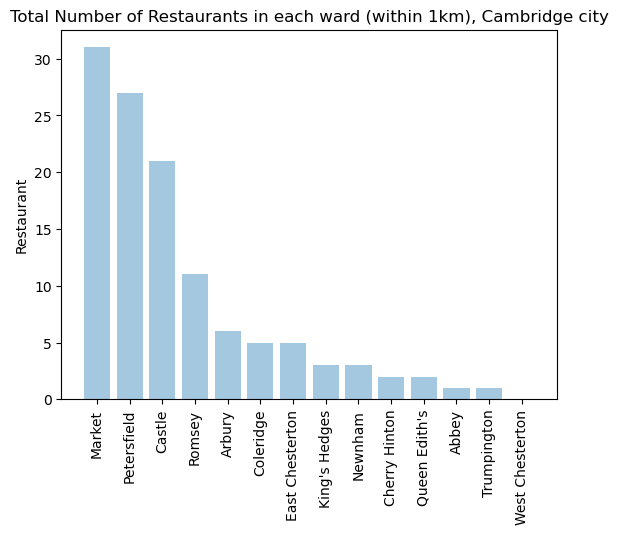

In [145]:
objects = df_cambridge_restaurant_sum['Ward']
y_pos = np.arange(len(objects))
performance = df_cambridge_restaurant_sum['Number of Restaurants']

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Restaurant')
plt.title('Total Number of Restaurants in each ward (within 1km), Cambridge city')
plt.xticks(rotation=90)

plt.show()

Similarly with the trend of total venues, Market ward has the most number of restaurants, which will be quite convenient for anyone who is interested in eating outside regularly.

#### Create a new dataframe with top 10 venues for each neighbourhood

In [146]:
# Write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [147]:
# Create the new dataframe and display the top 10 venues for each neighbourhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
df_cambridge_venues_sorted = pd.DataFrame(columns=columns)
df_cambridge_venues_sorted['Ward'] = df_cambridge_venues_grouped_mean['Ward']

for ind in np.arange(df_cambridge_venues_grouped_mean.shape[0]):
    df_cambridge_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_cambridge_venues_grouped_mean.iloc[ind, :], num_top_venues)

df_cambridge_venues_sorted

Ward 1st Most Common Venue 2nd Most Common Venue  \
0             Abbey                   Pub         Grocery Store   
1            Arbury                   Pub     Indian Restaurant   
2            Castle                   Pub                  Café   
3     Cherry Hinton                  Park              Pharmacy   
4         Coleridge                   Pub         Deli / Bodega   
5   East Chesterton  Fast Food Restaurant     Convenience Store   
6     King's Hedges         Grocery Store       Bed & Breakfast   
7            Market                   Pub           Coffee Shop   
8           Newnham                   Pub                  Park   
9       Petersfield                   Pub                  Café   
10    Queen Edith's           Coffee Shop  Fast Food Restaurant   
11           Romsey                   Pub         Grocery Store   
12      Trumpington                   Pub           Supermarket   
13  West Chesterton       Bed & Breakfast         Grocery Store   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0      Indian Restaurant                Market               Pet Store   
1          Grocery Store     Convenience Store             Coffee Shop   
2                   Park          Burger Joint             Coffee Shop   
3                  Plaza         Grocery Store    Gym / Fitness Center   
4                   Café         Grocery Store                   Hotel   
5            Coffee Shop              Bus Stop  Furniture / Home Store   
6                    Pub           Bus Station                  Office   
7                  Hotel                   Bar                    Café   
8          Grocery Store          Tennis Court              Restaurant   
9            Coffee Shop    Chinese Restaurant           Grocery Store   
10            Food Court           Bus Station            Soccer Field   
11           Coffee Shop                  Café       Indian Restaurant   
12      Department Store           Bus Station    Fast Food Restaurant   
13                   Pub           Post Office             Coffee Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Field     Convenience Store              Creperie   
1          Boat or Ferry                 Field          Noodle House   
2             Restaurant         Grocery Store     Indian Restaurant   
3        Warehouse Store     Convenience Store     Indian Restaurant   
4      Fish & Chips Shop    Italian Restaurant  Fast Food Restaurant   
5    Sporting Goods Shop        Soccer Stadium              Pharmacy   
6      Convenience Store                  Park            Restaurant   
7     Chinese Restaurant         Grocery Store            Restaurant   
8          Rugby Stadium    Seafood Restaurant                Bakery   
9                  Hotel     Indian Restaurant                   Bar   
10                   Pub      Greek Restaurant             Gift Shop   
11                   Bar        Sandwich Place         Deli / Bodega   
12     Food & Drink Shop      Greek Restaurant    English Restaurant   
13            Playground              Platform                  Park   

         9th Most Common Venue      10th Most Common Venue  
0                Deli / Bodega            Department Store  
1                         Park                 Pizza Place  
2             Sushi Restaurant                   Wine Shop  
3                    Gastropub  Construction & Landscaping  
4           Seafood Restaurant                        Park  
5                  Pizza Place                    Platform  
6           Chinese Restaurant                 Coffee Shop  
7             Asian Restaurant           Indian Restaurant  
8                 Soccer Field             Thai Restaurant  
9                       Bakery               Deli / Bodega  
10  Construction & Landscaping           Convenience Store  
11          African Restaurant                       Hotel  
12           Convenience

##### 1.8. Apply Machine Learning <a name="Apply_Machine_Learning"></a>

I use k-Means, an Unsupervised Machine Learning algorithm to group the data into k number of clusters.

In [148]:
#!conda install scikit-learn
from sklearn.cluster import KMeans # import k-means from clustering stage
#There are different metric distance function for spatial distance. I choose correlation instead of euclidean because the canberra function gives me more clear view of elbow break point.
from scipy.spatial.distance import cdist

#### Find optimal number of Clusters (Elbow Method)
For this method, the dataset is fit with the k-means model for a range of values (1-10). The distortions for each value of k is stored and then plotted on a line chart. The point of inflection is a good indication that the model fits best at that point.

In [149]:
# Create a new dataframe and drop 'Ward' column as ML algorithm can be done for only numerical values
df_cambridge_venues_clustering = df_cambridge_venues_grouped_mean.drop('Ward', 1).copy(deep=True)
df_cambridge_venues_clustering.head()

African Restaurant  American Restaurant  Art Gallery  Arts & Crafts Store  \
0                 0.0             0.000000     0.000000                  0.0   
1                 0.0             0.000000     0.000000                  0.0   
2                 0.0             0.010417     0.010417                  0.0   
3                 0.0             0.000000     0.000000                  0.0   
4                 0.0             0.000000     0.000000                  0.0   

   Asian Restaurant  BBQ Joint  Bakery       Bar  Bed & Breakfast  Beer Bar  \
0               0.0        0.0     0.0  0.000000         0.000000  0.000000   
1               0.0        0.0     0.0  0.000000         0.000000  0.000000   
2               0.0        0.0     0.0  0.020833         0.010417  0.020833   
3               0.0        0.0     0.0  0.000000         0.000000  0.000000   
4               0.0        0.0     0.0  0.034483         0.000000  0.000000   

   Beer Garden  Boat or Ferry  Bookstore  Botanical Garden  Breakfast Spot  \
0          0.0       0.000000   0.000000               0.0             0.0   
1          0.0       0.043478   0.000000               0.0             0.0   
2          0.0       0.000000   0.020833               0.0             0.0   
3          0.0       0.000000   0.000000               0.0             0.0   
4          0.0       0.000000   0.000000               0.0             0.0   

   Brewery  Buffet  Burger Joint  Burrito Place  Bus Station  Bus Stop  \
0      0.0     0.0      0.000000       0.000000          0.0       0.0   
1      0.0     0.0      0.000000       0.000000          0.0       0.0   
2      0.0     0.0      0.052083       0.010417          0.0       0.0   
3      0.0     0.0      0.000000       0.000000          0.0       0.0   
4      0.0     0.0      0.000000       0.000000          0.0       0.0   

       Café  Candy Store  Carpet Store  Chinese Restaurant  Clothing Store  \
0  0.000000     0.000000           0.0            0.000000             0.0   
1  0.000000     0.000000           0.0            0.043478             0.0   
2  0.052083     0.020833           0.0            0.010417             0.0   
3  0.000000     0.000000           0.0            0.000000             0.0   
4  0.068966     0.000000           0.0            0.000000             0.0   

   Coffee Shop  Concert Hall  Construction & Landscaping  Convenience Store  \
0     0.000000           0.0                    0.000000           0.000000   
1     0.043478           0.0                    0.000000           0.086957   
2     0.041667           0.0                    0.000000           0.000000   
3     0.000000           0.0                    0.066667           0.066667   
4     0.000000           0.0                    0.000000           0.034483   

   Creperie  Deli / Bodega  Department Store  Discount Store  \
0  0.000000       0.000000               0.0             0.0   
1  0.000000       0.000000               0.0             0.0   
2  0.010417       0.000000               0.0             0.0   
3  0.000000       0.000000               0.0             0.0   
4  0.000000       0.103448               0.0             0.0   

   Dumpling Restaurant  Eastern European Restaurant  Electronics Store  \
0                  0.0                     0.000000           0.000000   
1                  0.0                     0.000000           0.000000   
2                  0.0                     0.010417           0.010417   
3                  0.0                     0.000000           0.000000   
4                  0.0                     0.000000           0.000000   

   English Restaurant  Fast Food Restaurant     Field  Fish & Chips Shop  \
0            0.000000              0.000000  0.000000           0.000000   
1            0.000000              0.000000  0.043478           0.000000   
2            0.020833              0.000000  0.000000           0.000000   
3            0.000000              0.000000  0.000000  

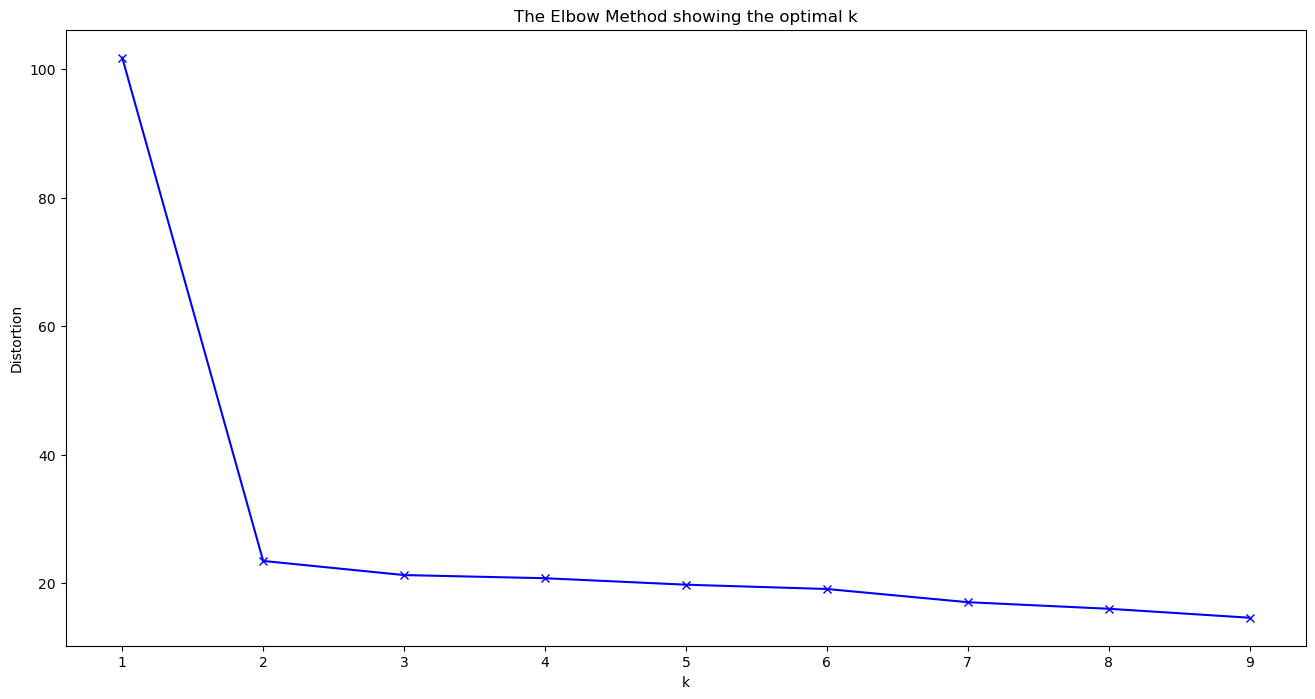

In [150]:
distortions = [] # Store results on distortions in a list
K = range(1, 10) # Initialize k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(df_cambridge_venues_clustering)
    distortions.append(sum(np.min(cdist(df_cambridge_venues_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / df_cambridge_venues_clustering.shape[0])

# Plot Elbow
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [151]:
# KneeLocator is used to compute the point of inflection especially when it is difficult to locate the point of inflection from the curve
# Uncomment if kneed is not yet installed
!conda install -c conda-forge kneed -y # need to add -y since it will ask during the installation

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    kneed-0.7.0                |     pyh9f0ad1d_0          12 KB  conda-forge
    scikit-learn-0.24.2        |   py36h2fdd933_1         7.5 MB  conda-forge
    threadpoolctl-2.2.0        |     pyh8a188c0_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.8 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.0.1-pyhd8ed1ab_0
  kneed              conda-forge/noarch::kneed-0.7.0-pyh9f0ad1d_0
  scikit-learn       conda-forge/linux-64::scikit-learn-0.24.2-py36h2fdd933_1
  threadp

In [152]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10),
                 distortions,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 2


In [153]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cambridge_venues_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

#### Create a new dataframe that includes the cluster and the top 10 venues for each ward

In [154]:
df_cambridge_merged = df_cambridge_ward.copy(deep=True)
# add clustering labels
df_cambridge_merged['Cluster Label'] = labels
# merge df_cambridge_venues_sorted with df_cambridge_ward to add latitude/longitude for each ward
df_cambridge_merged = df_cambridge_merged.join(df_cambridge_venues_sorted.set_index('Ward'), on='Ward')

df_cambridge_merged

Ward Ward Latitude Ward Longitude  \
0             Abbey       52.3138      0.0502717   
1            Arbury        52.221       0.114808   
2            Castle        52.212       0.114699   
3     Cherry Hinton       52.1878       0.175241   
4         Coleridge       52.1937       0.152713   
5   East Chesterton       52.2165       0.156338   
6     King's Hedges       52.2292       0.135074   
7            Market       52.1964       0.129776   
8           Newnham       52.1965       0.107044   
9       Petersfield       52.1998       0.135933   
10    Queen Edith's       52.1766       0.147808   
11           Romsey        52.198       0.148062   
12      Trumpington        52.174       0.112116   
13  West Chesterton       52.2223       0.144592   

                                              Address  Cluster Label  \
0   (The Abbey, Over Mereway, Fenlow Farm, Willing...              0   
1   (Arbury Ward, Chesterton, Cambridge, Cambridge...              0   
2   (Castle Mound, Cambridge, Cambridgeshire, East...              0   
3   (Cherry Hinton, Cambridge, Cambridgeshire, Eas...              0   
4   (Coleridge Community College, Radegund Road, R...              0   
5   (E, Beadle Industrial Estate, Barnwell, Cambri...              0   
6   (King's Hedges Ward, Chesterton, Cambridge, Ca...              0   
7   (HSBC UK, 62, Hills Road, Petersfield, Cambrid...              0   
8   (Newnham, Cambridge, Cambridgeshire, East of E...              0   
9   (Petersfield, Cambridge, Cambridgeshire, East ...              0   
10  (Queen Edith's Ward, Cambridge, Cambridgeshire...              1   
11  (Romsey, Cambridge, Cambridgeshire, East of En...              0   
12  (Trumpington, Cambridge, Cambridgeshire, East ...              0   
13  (Chesterton, Cambridge, Cambridgeshire, East o...              0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                    Pub         Grocery Store     Indian Restaurant   
1                    Pub     Indian Restaurant         Grocery Store   
2                    Pub                  Café                  Park   
3                   Park              Pharmacy                 Plaza   
4                    Pub         Deli / Bodega                  Café   
5   Fast Food Restaurant     Convenience Store           Coffee Shop   
6          Grocery Store       Bed & Breakfast                   Pub   
7                    Pub           Coffee Shop                 Hotel   
8                    Pub                  Park         Grocery Store   
9                    Pub                  Café           Coffee Shop   
10           Coffee Shop  Fast Food Restaurant            Food Court   
11                   Pub         Grocery Store           Coffee Shop   
12                   Pub           Supermarket      Department Store   
13       Bed & Breakfast         Grocery Store                   Pub   

   4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
0                 Market               Pet Store                 Field   
1      Convenience Store             Coffee Shop         Boat or Ferry   
2           Burger Joint             Coffee Shop            Restaurant   
3          Grocery Store    Gym / Fitness Center       Warehouse Store   
4          Grocery Store                   Hotel     Fish & Chips Shop   
5               Bus Stop  Furniture / Home Store   Sporting Goods Shop   
6            Bus Station                  Office     Convenience Store   
7                    Bar                    Café    Chinese Restaurant   
8           Tennis Court              Restaurant         Rugby Stadium   
9     Chinese Restaurant           Grocery Store                 Hotel   
10           Bus Station            Soccer Field                   Pub   
11                  Café       Indian Restaurant                   Bar   
12           Bus Station    Fast Food Restaurant     Food & Drink Shop   
13           Post Office            

#### Visualize the resulting clusters

In [155]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, ward, cluster in zip(df_cambridge_merged['Ward Latitude'], df_cambridge_merged['Ward Longitude'], df_cambridge_merged['Ward'], df_cambridge_merged['Cluster Label']):
    label = folium.Popup(str(ward) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### Examine Clusters

In [156]:
# Cluster 0
df_cambridge_merged.loc[df_cambridge_merged['Cluster Label'] == 0, df_cambridge_merged.columns[[0] + list(range(4, df_cambridge_merged.shape[1]))]]

Ward  Cluster Label 1st Most Common Venue  \
0             Abbey              0                   Pub   
1            Arbury              0                   Pub   
2            Castle              0                   Pub   
3     Cherry Hinton              0                  Park   
4         Coleridge              0                   Pub   
5   East Chesterton              0  Fast Food Restaurant   
6     King's Hedges              0         Grocery Store   
7            Market              0                   Pub   
8           Newnham              0                   Pub   
9       Petersfield              0                   Pub   
11           Romsey              0                   Pub   
12      Trumpington              0                   Pub   
13  West Chesterton              0       Bed & Breakfast   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Grocery Store     Indian Restaurant                Market   
1      Indian Restaurant         Grocery Store     Convenience Store   
2                   Café                  Park          Burger Joint   
3               Pharmacy                 Plaza         Grocery Store   
4          Deli / Bodega                  Café         Grocery Store   
5      Convenience Store           Coffee Shop              Bus Stop   
6        Bed & Breakfast                   Pub           Bus Station   
7            Coffee Shop                 Hotel                   Bar   
8                   Park         Grocery Store          Tennis Court   
9                   Café           Coffee Shop    Chinese Restaurant   
11         Grocery Store           Coffee Shop                  Café   
12           Supermarket      Department Store           Bus Station   
13         Grocery Store                   Pub           Post Office   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                Pet Store                 Field     Convenience Store   
1              Coffee Shop         Boat or Ferry                 Field   
2              Coffee Shop            Restaurant         Grocery Store   
3     Gym / Fitness Center       Warehouse Store     Convenience Store   
4                    Hotel     Fish & Chips Shop    Italian Restaurant   
5   Furniture / Home Store   Sporting Goods Shop        Soccer Stadium   
6                   Office     Convenience Store                  Park   
7                     Café    Chinese Restaurant         Grocery Store   
8               Restaurant         Rugby Stadium    Seafood Restaurant   
9            Grocery Store                 Hotel     Indian Restaurant   
11       Indian Restaurant                   Bar        Sandwich Place   
12    Fast Food Restaurant     Food & Drink Shop      Greek Restaurant   
13             Coffee Shop            Playground              Platform   

   8th Most Common Venue 9th Most Common Venue      10th Most Common Venue  
0               Creperie         Deli / Bodega            Department Store  
1           Noodle House                  Park                 Pizza Place  
2      Indian Restaurant      Sushi Restaurant                   Wine Shop  
3      Indian Restaurant             Gastropub  Construction & Landscaping  
4   Fast Food Restaurant    Seafood Restaurant                        Park  
5               Pharmacy           Pizza Place                    Platform  
6             Restaurant    Chinese Restaurant                 Coffee Shop  
7             Restaurant      Asian Restaurant           Indian Restaurant  
8                 Bakery          Soccer Field             Thai Restaurant  
9                    Bar                Bakery               Deli / Bodega  
11         Deli / Bodega    African Restaurant                       Hotel  
12    English Restaurant     Convenience Store                    Creperie  
13                  Park           Beer Garden                 Pop-Up Shop

In [157]:
# Cluster 1
df_cambridge_merged.loc[df_cambridge_merged['Cluster Label'] == 1, df_cambridge_merged.columns[[0] + list(range(4, df_cambridge_merged.shape[1]))]]

Ward  Cluster Label 1st Most Common Venue 2nd Most Common Venue  \
10  Queen Edith's              1           Coffee Shop  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10            Food Court           Bus Station          Soccer Field   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10                   Pub      Greek Restaurant             Gift Shop   

         9th Most Common Venue 10th Most Common Venue  
10  Construction & Landscaping      Convenience Store

For the clustering and ranking for the most common venue, most of the wards are equipped with pub. This is probably a traditional aspect in Cambridge as well as in UK.

#### 2. Results <a name="Results"></a>

From all the data collected, below are few of insights I found:
1. Newnham town has the most diversity of residences.
2. Market ward has the largest rented privately/other tenure.
3. There is huge number of students in Castle, arket and Newnham wards. The highest unemployed percentage is at King's Hedges ward.
4. More other Asian ethnicity population in Cherry Hinton ward, where it may be better for other Asian communities.
5. Residences in Market ward have the best health condition.
6. Depending on the age of each child in the family, it may be beneficial to select the ward that has more similar age population. So that, the child or even adult can have more friends at similar age. Lets say for a child at 10 years old, its better to select Trumpington or Cherry Hinton ward to live.
7. King's Hedges ward has the highest no qualification residences which may be better to avoid if you are looking for high academic place to live.
8. Cherry Hinton ward has the highest percentage of Christian residences.
9. Newnham ward has the highest number of residences that stays less than 2 years.
10. In Castle, Market and Newnham ward, large percentages are traveling to work but not in employment. Travel to work by bicycle is quite common in most of wards.
11. Based on the descriptive statistics, the highest crime rate is for Anti Social Behaviour (ASB) and the 2nd highest is theft of pedal cycles in 2013-2014 fiscal year.
12. Its quite clear that the higher no qualification number will lead to higher unemployed residences, however the total crime rate is not following this trend.
13. Newnham ward is the most expensive place to buy houses.
14. Pub is the most popular venue in Cambridge, more than double the grocery store.

#### 3. Discussion <a name="Discussion"></a>

The most consuming time for me in this project is to find the data I need and learn different ways to wrangle the data. It is really challenging at some points where there data is not in the required format. This process eventually allows me to practise python and googling faster.

#### 4. Conclusion <a name="Conclusion"></a>

Even though, I myself found quite many interesting insights from the data I collected, I still see that many gaps can be improved, which will require more time. Those are:
- More accurate ward coordinates (I did not want to manually input in my table) from **[data.cambridgeshireinsight](https://data.cambridgeshireinsight.org.uk/)**, in geojson format. I was not able to extract the geojson data yet from full geojson data of UK (> 500Mb).
- Incorporate more data (wait on the soon release census survey in UK on 2021)
- Explore more with currently available census data